Goal: To process the data clean it and convert it into labelled data
initial data :raw file
- step1: do ICA on raw data
- step2: take the data recombine it excluding the unwanted parts and adding only the important signals
- step3:take the combined data and seperate the think signals from the experiment into trails of directions.
- step4:take the seperated data and store it by labelling it to it's corresponding direction.

In [ ]:
try:
  import mne
  import numpy as np
  import os
  import glob
  from zipfile import ZipFile
  import tensorflow as tf
  from sklearn.preprocessing import StandardScaler
  from sklearn.model_selection import train_test_split
  # drive.mount('/content/drive')
  from keras.models import Sequential
  from keras.layers import LSTM, Dense
  from sklearn.model_selection import train_test_split
  from sklearn.preprocessing import StandardScaler

  from sklearn.preprocessing import LabelEncoder
  # from keras.utils import to_categorical

  from keras.models import Sequential
  from keras.layers import LSTM, GRU, Dense, Dropout, TimeDistributed, BatchNormalization, Flatten, Activation
  from keras import regularizers
  from keras.callbacks import EarlyStopping, ModelCheckpoint
  from keras.models import load_model
  import matplotlib.pyplot as plt

  from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

  import warnings
except ModuleNotFoundError:
  !pip install mne

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
work_dir = '/content/drive/My Drive/data_eeg'

Mounted at /content/drive


In [ ]:
raw= mne.io.read_raw_edf("/content/drive/MyDrive/data_eeg/data_eeg/Sub-1/Exp1/sub1_exp1.edf", preload=True)

Extracting EDF parameters from /content/drive/MyDrive/data_eeg/data_eeg/Sub-1/Exp1/sub1_exp1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 32249  =      0.000 ...   128.996 secs...


<li>Delta 0.5-4Hz</li>
<li>Theta 4-8Hz</li>
<li>Alpha 8-12Hz</li>
<li>Beta 12-30Hz</li>
<li>Gamma 30-100Hz</li>

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 30 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 30.00
- Lower transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 26.25 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 111 samples (0.444 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 12 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 12.00
- Lower transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 10.50 Hz)
- Upper passband e

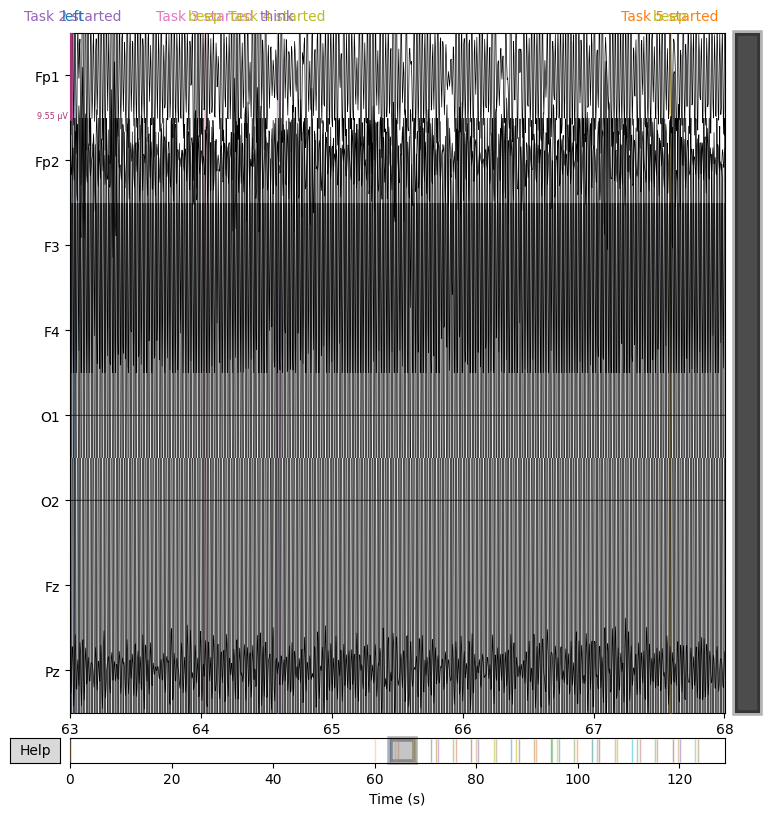

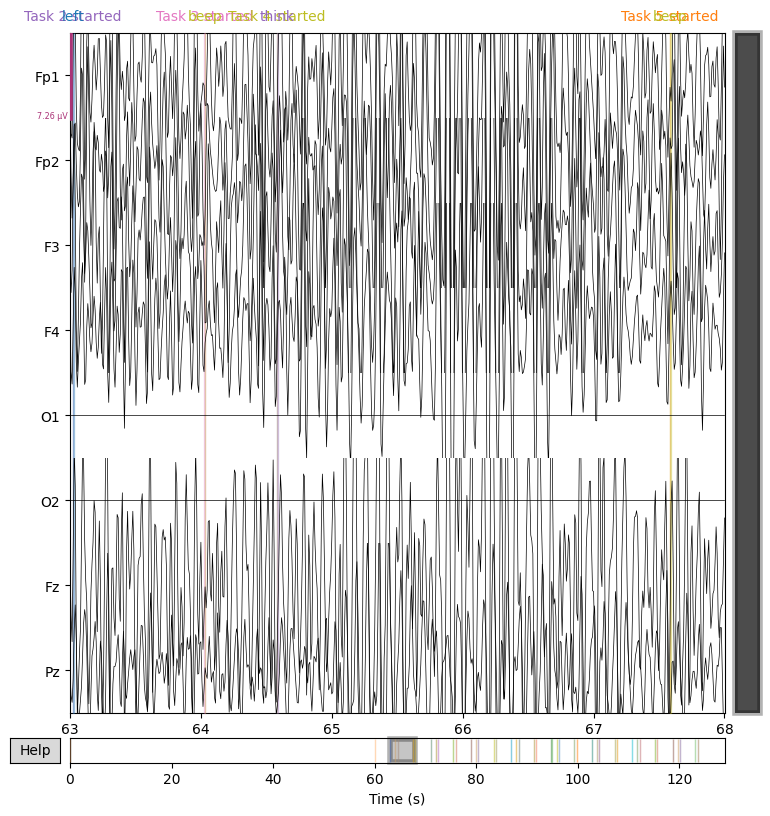

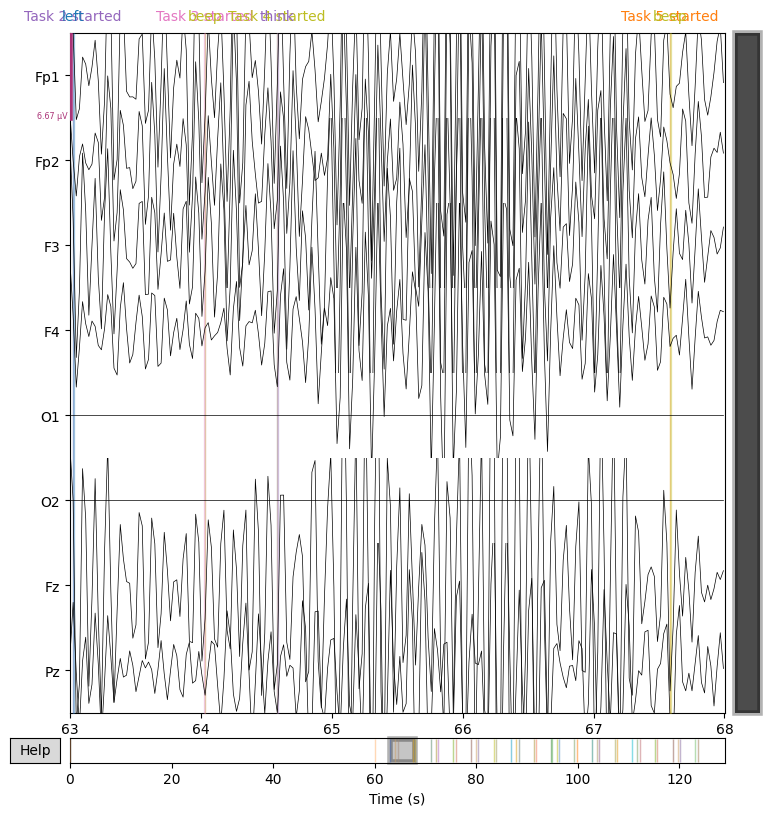

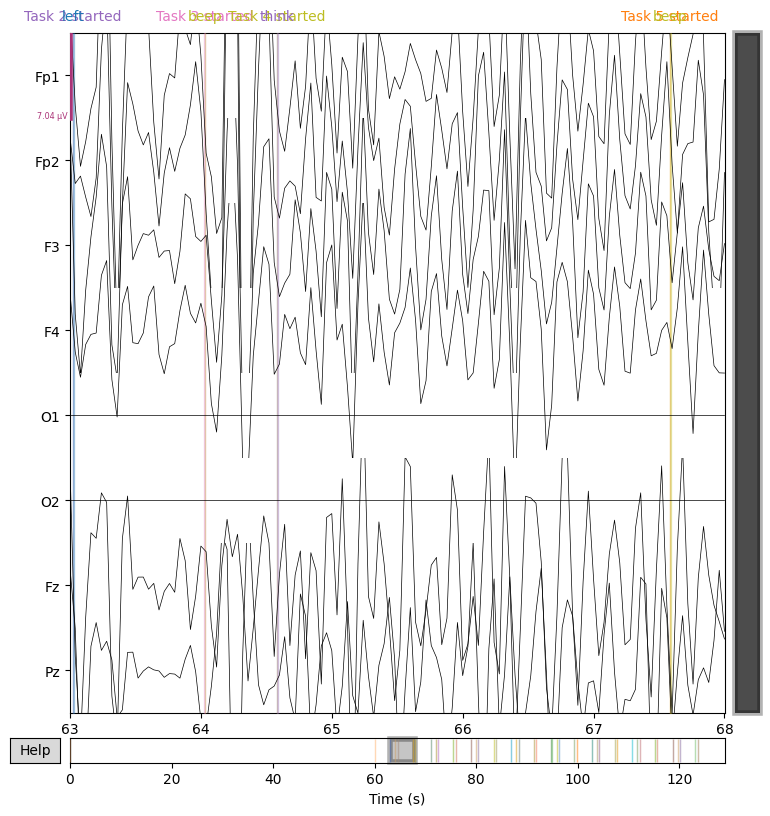

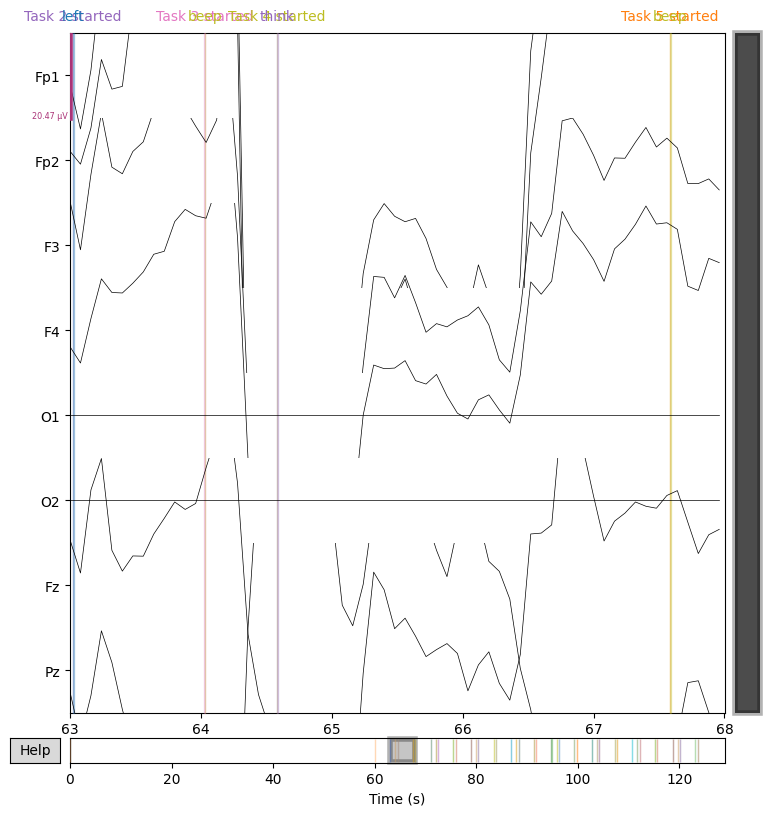

In [ ]:
for
    gamma_filtered = raw.copy().filter(l_freq=30, h_freq=50)
    beta_filtered = raw.copy().filter(l_freq=12, h_freq=30)
    alpha_filtered = raw.copy().filter(l_freq=8, h_freq=12)
    theta_filtered = raw.copy().filter(l_freq=4, h_freq=8)
    delta_filtered = raw.copy().filter(l_freq=0.5, h_freq=4)

    # Plot the gamma filtered data
    iter=1 #max can be adjusted to 64
    for i in range(iter):
        gamma_filtered.plot(scalings='auto', title='Gamma Band (30-100 Hz)',start=63+i,duration=5,show=True)
        beta_filtered.plot(scalings='auto', title='beta Band (30-100 Hz)',start=63+i,duration=5,show=True)
        alpha_filtered.plot(scalings='auto', title='alpha Band (30-100 Hz)',start=63+i,duration=5,show=True)
        theta_filtered.plot(scalings='auto', title='theta Band (30-100 Hz)',start=63+i,duration=5,show=True)
        delta_filtered.plot(scalings='auto', title='delta Band (30-100 Hz)',start=63+i,duration=5,show=True)

Used Annotations descriptions: ['Baseline Calculation started', 'Baseline calculation completed - Task 1 ', 'Task 10 started', 'Task 11 started', 'Task 12 started', 'Task 13 started', 'Task 14 started', 'Task 15 started', 'Task 16 started', 'Task 17 started', 'Task 18 started', 'Task 19 started', 'Task 2 started', 'Task 20 started', 'Task 21 started', 'Task 22 started', 'Task 23 started', 'Task 24 started', 'Task 25 started', 'Task 26 started', 'Task 27 started', 'Task 28 started', 'Task 29 started', 'Task 3 started', 'Task 30 started', 'Task 31 started', 'Task 32 started', 'Task 33 started', 'Task 34 started', 'Task 35 started', 'Task 36 started', 'Task 37 started', 'Task 38 started', 'Task 39 started', 'Task 4 started', 'Task 40 started', 'Task 41 started', 'Task 5 started', 'Task 6 started', 'Task 7 started', 'Task 8 started', 'Task 9 started', 'baseline', 'beep', 'down', 'left', 'rest', 'right', 'think', 'up']
Not setting metadata
8 matching events found
Applying baseline correctio

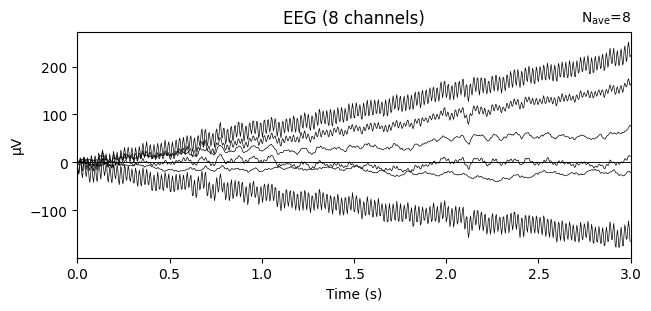

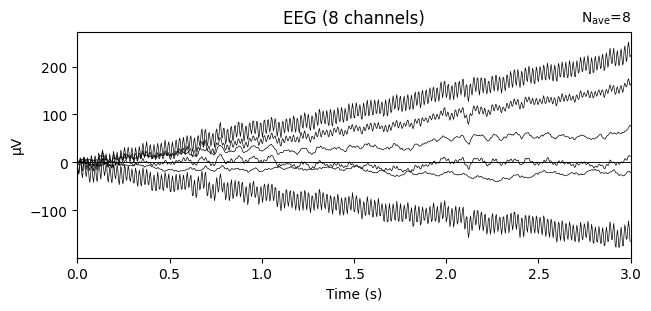

In [ ]:
# Create epochs from raw data
events, event_dict = mne.events_from_annotations(raw)
think_event_id = event_dict['think']
think_events = events[events[:, 2] == think_event_id]

# Create epochs using the filtered 'think' events
epochs = mne.Epochs(raw, think_events, event_id={'think': think_event_id},
                    tmin=0, tmax=3, baseline=(0, 0), preload=True, event_repeated="merge")

# Compute the evoked response
evoked = epochs.average()
evoked.plot()


In [ ]:
# with ZipFile("/content/drive/MyDrive/eeg_research/data_eeg.zip",'r') as zObject:
#   zObject.extractall(path="/content/drive/MyDrive/eeg_research")

#for deleting unwanted files


# # Path to the directory
# dir_path = '/content/drive/MyDrive/eeg_research/data_eeg/Sub-1/Exp1'

# # List of files to be deleted
# files_to_delete = [
#     'sub_1_exp_1_D_1.edf',
#     'sub_1_exp_1_D_2.edf',
#     'sub_1_exp_1_L_1.edf',
#     'sub_1_exp_1_L_2.edf',
#     'sub_1_exp_1_U_1.edf',
#     'sub_1_exp_1_U_2.edf',
#     'sub_1_exp_1_R_1.edf',
#     'sub_1_exp_1_R_2.edf'
# ]

# # Delete each file
# for file_name in files_to_delete:
#     file_path = os.path.join(dir_path, file_name)
#     if os.path.exists(file_path):
#         os.remove(file_path)
#         print(f'{file_name} deleted successfully.')
#     else:
#         print(f'{file_name} not found in the directory.')

#DATA PREPROCESSING

In [ ]:
raw = mne.io.read_raw_edf("/content/drive/MyDrive/eeg_research/data_eeg/Sub-1/Exp1/sub1_exp1.edf", preload=True)
# print("/content/drive/MyDrive/eeg_research/data_eeg/Sub-1/Exp1/sub1_exp1.edf")
# print(work_dir+('/Sub-1/Exp1/sub_1_exp1.edf'))

Extracting EDF parameters from /content/drive/MyDrive/eeg_research/data_eeg/Sub-1/Exp1/sub1_exp1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 32249  =      0.000 ...   128.996 secs...


In [ ]:
n_time_samps = raw.n_times
time_secs = raw.times
ch_names = raw.ch_names
n_chan = len(ch_names)  # note: there is no raw.n_channels attribute
print(
    f"the (cropped) sample data object has {n_time_samps} time samples and "
    f"{n_chan} channels."
)
print(f"The last time sample is at {time_secs[-1]} seconds.")
print("The first few channel names are {}.".format(", ".join(ch_names[:3])))
print()  # insert a blank line in the output

# some examples of raw.info:
print("bad channels:", raw.info["bads"])  # chs marked "bad" during acquisition
print(raw.info["sfreq"], "Hz")  # sampling frequency
print(raw.info["description"], "\n")  # miscellaneous acquisition info

print(raw.info)

the (cropped) sample data object has 32250 time samples and 8 channels.
The last time sample is at 128.996 seconds.
The first few channel names are Fp1, Fp2, F3.

bad channels: []
250.0 Hz
None 

<Info | 8 non-empty values
 bads: []
 ch_names: Fp1, Fp2, F3, F4, O1, O2, Fz, Pz
 chs: 8 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 125.0 Hz
 meas_date: 2024-07-02 14:40:11 UTC
 nchan: 8
 projs: []
 sfreq: 250.0 Hz
 subject_info: 3 items (dict)
>


In [ ]:
raw.describe()

<RawEDF | sub1_exp1.edf, 8 x 32250 (129.0 s), ~2.0 MB, data loaded>
ch  name  type  unit        min         Q1     median         Q3        max
 0  Fp1   EEG   µV         1.21   28263.89   29121.21   29819.24   30456.44
 1  Fp2   EEG   µV     -2310.09   -2049.42   -1858.26   -1693.17       1.21
 2  F3    EEG   µV         1.21   20556.68   22456.69   24084.44   25564.48
 3  F4    EEG   µV         1.21   16910.16   19351.79   21596.47   24020.72
 4  O1    EEG   µV         1.21  187500.00  187500.00  187500.00  187500.00
 5  O2    EEG   µV         1.21  187500.00  187500.00  187500.00  187500.00
 6  Fz    EEG   µV         1.21   39533.63   41187.45   42954.23   45207.60
 7  Pz    EEG   µV         1.21  152619.13  152703.12  152784.22  152958.00


In [ ]:
!pip install edfio

In [ ]:
def sep_edf(path,sub,exp):
    raw = mne.io.read_raw_edf(path, preload=True);
    raw.set_eeg_reference('average');
    freqs = np.arange(50, 126, 50)
    raw.notch_filter(freqs=freqs, picks='eeg');
    raw.filter(l_freq=0.5, h_freq=100);
    annotations = raw.annotations
    think_annotations = annotations[annotations.description == 'think']
    think_timestamps = think_annotations.onset * raw.info['sfreq']
    start_samples = np.floor(think_timestamps).astype(int)
    end_samples = np.floor(think_timestamps+750).astype(int)
    for i in range(8):
        start_sample = start_samples[i]
        end_sample = end_samples[i]
        data, times = raw[:, start_sample:end_sample+1]
        if "_exp_1." in path:
            d = "LRUDRLDU"
        elif "_exp_2." in path:
            d = "UDLRDURL"
        elif "_exp_3." in path:
            d = "ULRDLDRU"
        elif "_exp_4." in path:
            d = "LUDRURDL"
        else:
            d = "DRLURLDU"
        exp_path = "/".join(path.split("/")[:-1]) + "/"
        if i < 4:
            file_name = f'sub_{sub}_exp_{exp}_{d[i]}_1.edf'
        else:
            file_name = f'sub_{sub}_exp_{exp}_{d[i]}_2.edf'
        file_name = exp_path + file_name
        print(file_name)
        new_raw = mne.io.RawArray(data, raw.info)
        mne.export.export_raw(file_name, new_raw, fmt='edf', overwrite=True)
        new_raw.close()
    return

In [ ]:
for foldername, _, filenames in os.walk("D:\data_eeg"):
    for filename in filenames:
        if filename.endswith(".edf"):
            file_path = os.path.join(foldername, filename)
            file_path = file_path.replace("\\","/")
#             sep_edf("file_path",file_path,file_path[-5],sub)
            for i in range(len(file_path)):
                if i==16:
                    if file_path[17]=="0":
                        sub=10
                    else:
                        sub=file_path[16]
            # sep_edf("file_path",file_path,file_path[-5],sub)
            # print("file_path",file_path,file_path[-5],sub)

In [ ]:
def apply_ica(path):
    raw = mne.io.read_raw_edf(path, preload=True);
    events, event_dict = mne.events_from_annotations(raw)
    epochs = mne.Epochs(raw, events, event_id=event_dict, tmin=0, tmax=3, baseline=(0, 0), preload=True, event_repeated='drop')
    ica = mne.preprocessing.ICA(n_components=None, random_state=23)
    ica.fit(epochs)
    picks = mne.pick_types(epochs.info, meg=False, eeg=True, exclude='bads')
    n_components = ica.n_components_
    ica.exclude = []
    exg_inds_Fp1, scores_ica = ica.find_bads_eog(epochs, ch_name='Fp1')
    ica.exclude.extend(exg_inds_Fp1)
    ica.apply(epochs)
    file_name = path.split(".")[0] + "_clean.fif"
    epochs.save(file_name, fmt='double',
                       split_size='2GB', overwrite=True)
    return epochs

In [ ]:
# l = apply_ica("/content/drive/MyDrive/eeg_research/data_eeg/sub1_exp1.edf")
edf_paths=[]
for sub in range(1,11):
  for ex in range(1,6):
    edf_paths.append(f"/content/drive/MyDrive/eeg_research/data_eeg/SUB-{sub}/Exp{ex}/sub{sub}_exp{ex}.edf")
for edf_path in edf_paths:
  l = apply_ica(edf_path)

Extracting EDF parameters from /content/D:/data_eeg/Sub-1/Exp1/sub1_exp1.edf...
EDF file detected


FileNotFoundError: [Errno 2] No such file or directory: '/content/D:/data_eeg/Sub-1/Exp1/sub1_exp1.edf'

In [ ]:
x = l.get_data()
y = np.zeros((x.shape[1],x.shape[2]))
for i in range(x.shape[0]):
    y = x[i] + y
y.shape

C:\Users\manideep\AppData\Local\Temp\ipykernel_6184\2768697725.py:1: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  x = l.get_data()


(8, 751)

In [ ]:
y[:,3:90].shape

(8, 87)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1651 samples (6.604 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upp

<ipython-input-7-8b022a33fb8e>:14: UserWarning: Zero value in spectrum for channels O1, O2
  raw.plot_psd()
<ipython-input-7-8b022a33fb8e>:14: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  raw.plot_psd()
<ipython-input-7-8b022a33fb8e>:14: UserWarning: Infinite value in PSD for channels O1, O2.
These channels might be dead.
  raw.plot_psd()
<ipython-input-7-8b022a33fb8e>:14: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd()


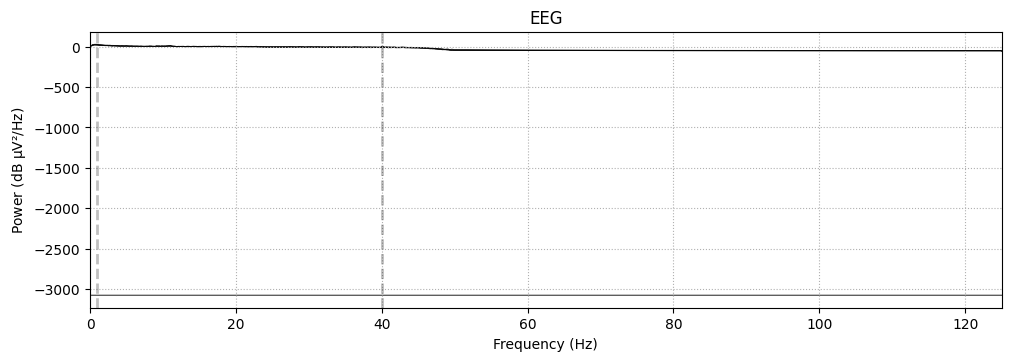

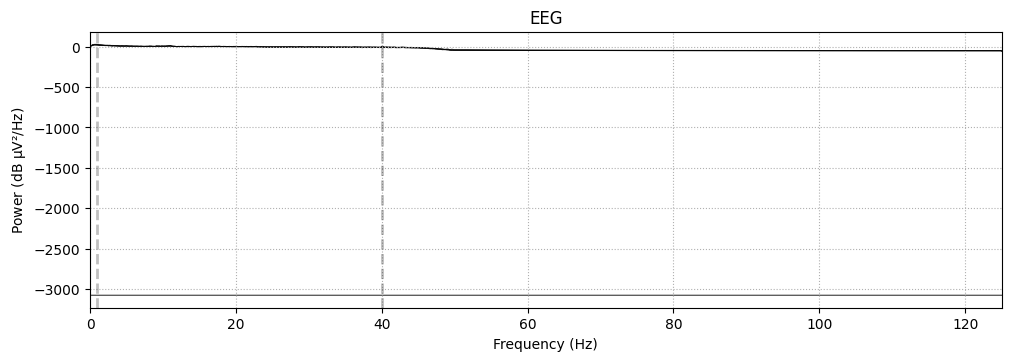

In [ ]:
channels = ['Fp1', 'Fp2', 'F3', 'F4', 'O1', 'O2', 'Fz', 'Pz']
raw.pick_channels(channels)
raw.set_eeg_reference(ref_channels=['O1', 'O2'])
#raw.plot(n_channels=8, duration=64,start=63,scalings='auto')

#final filters chosen
freqs = np.arange(50, 126, 50)
raw.notch_filter(freqs=freqs, picks='eeg')
#after notch filter
#raw.plot(n_channels=8, duration=64,start=63,scalings='auto')
#after applying bandpass filter
raw.filter(l_freq=1.0, h_freq=40)
# raw.plot(n_channels=8, duration=64,start=63,scalings='auto')
raw.plot_psd()

In [ ]:
%pip install edfio

In [ ]:
def apply_ica_simple(raw):
    ica = mne.preprocessing.ICA(n_components=6, random_state=23);
    # Fit ICA
    ica.fit(raw);
    # Apply ICA
    raw_clean = ica.apply(raw);

    return ica, raw_clean
    # events, event_dict = mne.events_from_annotations(raw)
    # print(events,event_dict)
    # epochs = mne.Epochs(raw, events, event_id=event_dict, tmin=0, tmax=3, baseline=(0, 0), preload=True, event_repeated='drop')
    # ica = mne.preprocessing.ICA(n_components=6, random_state=23)
    # ica.fit(epochs)
    # picks = mne.pick_types(epochs.info, meg=False, eeg=True, exclude='bads')
    # n_components = ica.n_components_
    # ica.exclude = []
    # exg_inds_Fp1, scores_ica = ica.find_bads_eog(epochs, ch_name='Fp1')
    # ica.exclude.extend(exg_inds_Fp1)
    # ica.apply(epochs)
    # file_name = path.split(".")[0] + "_clean.fif"
    # epochs.save(file_name, fmt='double',
    #                    split_size='2GB', overwrite=True)
    # return epochs

massive=[]
x_values=[]
y_values=[]

path='/content/drive/MyDrive/eeg_research/data_eeg/SUB-1/Exp1/sub1_exp1.edf'
sub=1
exp=1
ch_names = ['Fp1', 'Fp2', 'F3', 'F4', 'O1', 'O2', 'Fz', 'Pz']
ch_positions = {
    'Fp1': [0, 0, 1],
    'Fp2': [1, 0, 1],
    'F3': [0, 1, 1],
    'F4': [1, 1, 1],
    'O1': [0, 2, 1],
    'O2': [1, 2, 1],
    'Fz': [0.5, 0.5, 1],
    'Pz': [0.5, 1.5, 1]
}
montage = mne.channels.make_dig_montage(ch_pos=ch_positions, coord_frame='head')
raw.set_montage(montage)
mapping = {raw.info['ch_names'][i]: ch_names[i] for i in range(len(ch_names))}
raw.rename_channels(mapping)

# Set channel names
raw.info['ch_names'] = ch_names
annotations = raw.annotations
think_annotations = annotations[annotations.description == 'think']
think_timestamps = think_annotations.onset * raw.info['sfreq']
start_samples = np.floor(think_timestamps).astype(int)
end_samples = np.floor(think_timestamps+750).astype(int)
for i in range(8):
    start_sample = start_samples[i]
    end_sample = end_samples[i]
    data, times = raw[:, start_sample:end_sample+1]
    d = "LRUDRLDU"
    exp_path = "/".join(path.split("/")[:-1]) + "/"
    if i < 4:
        file_name = f'sub_{sub}_exp_{exp}_{d[i]}_1.edf'
    else:
        file_name = f'sub_{sub}_exp_{exp}_{d[i]}_2.edf'
    file_name = exp_path + file_name
    print(file_name)
    new_raw = mne.io.RawArray(data, raw.info)
    # print(new_raw.get_data())
    # new_raw.plot(scalings=dict(eeg=100e-6))
    # print(d[i])
    ica, rawclean = apply_ica_simple(new_raw)
    ica.plot_components()
    # print(rawclean.get_data().shape)
    # print(ica.get_components().shape)
    # print(rawclean.get_data()
    # rawclean.plot()
    # print("this is :",ica)
    # cls={'L':0,'R':1,'U':2,'D':3}
    # massive.append([cls[d[i]],rawclean.get_data()])
    # x_values.append([rawclean.get_data()])
    # y_values.append([d[i]])
    # print(new_raw.get_data())
    # Get ICA component
    # print(ica_data.shape)
    # print(rawcl.get_data())
    # l=apply_ica_simple(new_raw)
    # print(l.get_data().shape)
    # new_raw.plot()
    # mne.export.export_raw(file_name, new_raw, fmt='edf', overwrite=True)
    # new_raw.close()

RuntimeError: ch_names cannot be set directly. Please use methods inst.add_channels(), inst.drop_channels(), inst.pick(), inst.rename_channels(), inst.reorder_channels() and inst.set_channel_types() instead.

In [ ]:
# print(x_values[0][1].dtype)

float64


In [ ]:
ica_components = np.array(x_values)
labels = np.array(y_values)

In [ ]:
np.save('/content/drive/MyDrive/eeg_research/data_eeg/Sub-1/Exp1/ica_components.npy', ica_components)
np.save('/content/drive/MyDrive/eeg_research/data_eeg/Sub-1/Exp1/labels.npy', labels)

In [ ]:
classes={'L':0,'R':1,'U':2,'D':3}
print(classes['L'])

0


#FINAL PROCESSING

In [ ]:
drive_path="/content/drive/MyDrive/eeg_research/data_eeg"
pc_path="D:/data_eeg"

In [ ]:
#@title Filtering
def apply_filter(file_path):

    raw = mne.io.read_raw_edf(file_path, preload=True)

    # Set channel names
    channels = ['Fp1', 'Fp2', 'F3', 'F4', 'O1', 'O2', 'Fz', 'Pz']
    raw.pick_channels(channels)
    raw.set_eeg_reference(ref_channels=['O1', 'O2'])
    freqs = np.arange(50, 126, 50)
    raw.notch_filter(freqs=freqs, picks='eeg')
    raw.filter(l_freq=1.0, h_freq=40);

    # raw.set_eeg_reference('average')
    # freqs = np.arange(50, 126, 50)
    # raw.notch_filter(freqs=freqs, picks='eeg')
    # raw.filter(l_freq=0.5, h_freq=100)

    return raw


In [ ]:
SUB_PATH

In [ ]:
#@title ica and segmentation
def extract_think_epochs(file_path):
    # Load the raw EDF file
    raw = apply_filter(file_path)

    # Extract events and event dictionary from annotations
    events, event_dict = mne.events_from_annotations(raw)

    # Filter events to include only those corresponding to the 'think' annotation
    think_event_id = event_dict['think']
    think_events = events[events[:, 2] == think_event_id]

    # Create epochs using the filtered 'think' events
    epochs = mne.Epochs(raw, think_events, event_id={'think': think_event_id},
                        tmin=0, tmax=3, baseline=(0, 0), preload=True, event_repeated="merge")

    # Return the epoch data as a NumPy array
    return epochs.get_data()

# List to hold the epochs from all files
sub_epochs = []

# Iterate over files in the directory and process each EDF file

for foldername, _, filenames in os.walk(SUB_PATH):
    for filename in filenames:
        if filename.endswith(".edf"):
            file_path = os.path.join(foldername, filename).replace("\\", "/")
            print("Processing file:", file_path)
            # Extract think epochs from the current file and append to the list
            epochs_data = extract_think_epochs(file_path)
            sub_epochs.append(epochs_data)

# # # Concatenate all epochs into a single NumPy array
all_epochs_array = np.concatenate(sub_epochs, axis=0)
np.save('/content/drive/MyDrive/eeg_research/aearray',all_epochs_array)
# # # Check the shape of the resulting array
print("Shape of all epochs array:", all_epochs_array.shape)

Extracting EDF parameters from /content/drive/MyDrive/eeg_research/data_eeg/Sub-1/Exp1/sub1_exp1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 32249  =      0.000 ...   128.996 secs...
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1651 samples (6.604 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal b

<ipython-input-73-2ac2b935c1de>:18: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  return epochs.get_data()


In [ ]:
# l=["LRUDRLDU","UDLRDURL","ULRDLDRU","LUDRURDL","DRLURLDU"]
# y_values=[]
# for i in range(1,11):
#   for j in l:
#     for s in j:
#       if s=="L":
#         for i in range(8):
#             y_values.append(0)
#       elif s=="R":
#         for i in range(8):
#             y_values.append(1)
#       elif s=="U":
#         for i in range(8):
#             y_values.append(2)
#       elif s=="D":
#         for i in range(8):
#             y_values.append(3)
l=["LRUDRLDU","UDLRDURL","ULRDLDRU","LUDRURDL","DRLURLDU"]
y_values=[]
for i in range(1,11):
  for j in l:
    for s in j:
      if s=="L":
          y_values.append(0)
      elif s=="R":
          y_values.append(1)
      elif s=="U":
          y_values.append(2)
      elif s=="D":
          y_values.append(3)

y_val=np.array(y_values)
print(y_val.shape)
print(y_val)
np.save('/content/drive/MyDrive/eeg_research/ylabels',y_val)

(400,)
[0 1 2 3 1 0 3 2 2 3 0 1 3 2 1 0 2 0 1 3 0 3 1 2 0 2 3 1 2 1 3 0 3 1 0 2 1
 0 3 2 0 1 2 3 1 0 3 2 2 3 0 1 3 2 1 0 2 0 1 3 0 3 1 2 0 2 3 1 2 1 3 0 3 1
 0 2 1 0 3 2 0 1 2 3 1 0 3 2 2 3 0 1 3 2 1 0 2 0 1 3 0 3 1 2 0 2 3 1 2 1 3
 0 3 1 0 2 1 0 3 2 0 1 2 3 1 0 3 2 2 3 0 1 3 2 1 0 2 0 1 3 0 3 1 2 0 2 3 1
 2 1 3 0 3 1 0 2 1 0 3 2 0 1 2 3 1 0 3 2 2 3 0 1 3 2 1 0 2 0 1 3 0 3 1 2 0
 2 3 1 2 1 3 0 3 1 0 2 1 0 3 2 0 1 2 3 1 0 3 2 2 3 0 1 3 2 1 0 2 0 1 3 0 3
 1 2 0 2 3 1 2 1 3 0 3 1 0 2 1 0 3 2 0 1 2 3 1 0 3 2 2 3 0 1 3 2 1 0 2 0 1
 3 0 3 1 2 0 2 3 1 2 1 3 0 3 1 0 2 1 0 3 2 0 1 2 3 1 0 3 2 2 3 0 1 3 2 1 0
 2 0 1 3 0 3 1 2 0 2 3 1 2 1 3 0 3 1 0 2 1 0 3 2 0 1 2 3 1 0 3 2 2 3 0 1 3
 2 1 0 2 0 1 3 0 3 1 2 0 2 3 1 2 1 3 0 3 1 0 2 1 0 3 2 0 1 2 3 1 0 3 2 2 3
 0 1 3 2 1 0 2 0 1 3 0 3 1 2 0 2 3 1 2 1 3 0 3 1 0 2 1 0 3 2]


In [ ]:
np.save('/content/drive/MyDrive/eeg_research/aearray',all_epochs_array)

In [ ]:
np.save('/content/drive/MyDrive/eeg_research/ylabels',y_val)

In [ ]:
#lstm loading and processing
model_path="/content/drive/MyDrive/eeg_research/data_eeg/model/LSTM_model.keras"

# Load the pre-trained model # Replace with your model path
pretrained_model = tf.keras.models.load_model(model_path)

# Print the summary of the model to inspect the input and output layers
pretrained_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 640, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 640, 25)           7600      
                                                                 
 lstm_2 (LSTM)               (None, 640, 12)           1824      
                                                                 
 flatten (Flatten)           (None, 7680)              0         
                                                                 
 dense (Dense)               (None, 50)                384050    
                                                                 
 batch_normalization (Batch  (None, 50)                200       
 Normalization)                                                  
                                                        

In [ ]:
#@title data loading
import numpy as np

# Load your new dataset
X_new = np.load('/content/drive/MyDrive/eeg_research/aearray.npy')  # Replace with your file path
Y_new = np.load('/content/drive/MyDrive/eeg_research/ylabels.npy')  # Replace with your file path

# Ensure X_new and y_new are correctly shaped
print(X_new.shape)  # Should print (400, 8, 751)
print(Y_new.shape)  # Ensure it matches the number of samples


(400, 8, 751)
(400,)


In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load your dataset
# Assume X_new is your new dataset with shape (400, 8, 751) # Replace with actual labels

# Step 1: Normalize the data
X_reshaped = X_new.reshape(-1, 1)  # Reshape the data to be 2D for fitting
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_reshaped)
X_scaled = X_scaled.reshape(X_new.shape)

# Step 2: Reshape the data
# Flatten each trial and channel to a 1D vector
X_processed = []
Y_processed = []

for i in range(X_scaled.shape[0]):
    trial_data = X_scaled[i]
    trial_label = Y_new[i]
    # Iterate through channels
    for channel_data in trial_data:
        X_processed.append(channel_data)
        Y_processed.append(trial_label)

# Convert lists to numpy arrays
X_processed = np.array(X_processed)
Y_processed = np.array(Y_processed)

# The shape of X_processed should now be (400 * 8, 751) -> (3200, 751)
# We need to further reshape it to (3200, 640, 1)
X_processed_reshaped = X_processed[:, :640]  # Take the first 640 timesteps
X_processed_reshaped = X_processed_reshaped.reshape(-1, 640, 1)

# Correctly repeat the labels
Y_processed_repeated = np.repeat(Y_new, 8)  # Repeat each label 8 times for 8 channels

# Verify the shapes
print(X_processed_reshaped.shape)  # Expected: (3200, 640, 1)
print(Y_processed_repeated.shape)  # Expected: (3200,)

# Split the data into train, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X_processed_reshaped, Y_processed_repeated, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

print(X_train.shape, X_val.shape, X_test.shape)  # Verify the split sizes
print(y_train.shape, y_val.shape, y_test.shape)


(3200, 640, 1)
(3200,)
(1920, 640, 1) (640, 640, 1) (640, 640, 1)
(1920,) (640,) (640,)


In [ ]:
#@title transfer learning
# Define early stopping and model checkpoint
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=1)
checkpointer = tf.keras.callbacks.ModelCheckpoint(filepath='LSTM_model_finetuned.keras', monitor='val_accuracy', verbose=1, save_best_only=True)
callbacks_list = [early_stopping, checkpointer]


# Compile the model again to ensure it is ready for training
pretrained_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model on the new dataset
history = pretrained_model.fit(X_train, y_train,
                               batch_size=32, epochs=20, shuffle=False,
                               validation_data=(X_val, y_val),
                               callbacks=callbacks_list)

# Evaluate the model
loss, accuracy = pretrained_model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy * 100:.2f}%")


Epoch 1/20
60/60 [==============================] - ETA: 0s - loss: 1.3245 - accuracy: 0.3693
Epoch 1: val_accuracy improved from -inf to 0.23906, saving model to LSTM_model_finetuned.keras
60/60 [==============================] - 99s 2s/step - loss: 1.3245 - accuracy: 0.3693 - val_loss: 2.2396 - val_accuracy: 0.2391
Epoch 2/20
60/60 [==============================] - ETA: 0s - loss: 1.2682 - accuracy: 0.4031
Epoch 2: val_accuracy improved from 0.23906 to 0.29844, saving model to LSTM_model_finetuned.keras
60/60 [==============================] - 47s 787ms/step - loss: 1.2682 - accuracy: 0.4031 - val_loss: 1.4642 - val_accuracy: 0.2984
Epoch 3/20
60/60 [==============================] - ETA: 0s - loss: 1.2039 - accuracy: 0.4349
Epoch 3: val_accuracy improved from 0.29844 to 0.30312, saving model to LSTM_model_finetuned.keras
60/60 [==============================] - 50s 830ms/step - loss: 1.2039 - accuracy: 0.4349 - val_loss: 1.5113 - val_accuracy: 0.3031
Epoch 4/20
60/60 [=============

In [ ]:
# LSTM

def build_LSTM(input_shape):
    model = Sequential()
    #1
    model.add(LSTM(50, return_sequences=True, stateful=False,
             dropout = 0.5, input_shape=input_shape))

    #2
    model.add(LSTM(25, return_sequences=True, stateful=False,
            dropout = 0.3))

    #3
    model.add(LSTM(12, return_sequences=True, stateful=False,
             dropout = 0.1))
    model.add(Flatten())

    #4
    model.add(Dense(50))
    model.add(BatchNormalization(axis=-1))
    model.add(Activation('relu'))
    #model.add(Dropout(0.5))

    #5
    model.add(Dense(4, activation='softmax'))

    # Compile the model
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#     # Set up early stopping
#     early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1)

#     #define early stopping callback
#     earlystop = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=30, mode='auto')

#     # saves the model weights after each epoch if the validation loss decreased
#     checkpointer = ModelCheckpoint(filepath='/home/ssn/miniconda3/envs/innerspeech/Project/LSTM_model_gamma.hdf5', monitor='val_acc', verbose=1, save_best_only=True)

#     callbacks_list = [early_stopping, checkpointer]

    #model.summary()
    return model


In [ ]:
input_shape = (X_train.shape[1],1)
print(input_shape)

(640, 1)


In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1)
checkpointer = ModelCheckpoint(filepath="/content/drive/MyDrive/eeg_research/data_eeg/model/new_LSTM_model.keras", monitor='val_accuracy', verbose=1, save_best_only=True)
callbacks_list = [early_stopping, checkpointer]
model = build_LSTM(input_shape)
model.load_weights("/content/drive/MyDrive/eeg_research/data_eeg/model/new_LSTM_model.keras")
history = model.fit(X_train, y_train,
                    batch_size=32, epochs=20, shuffle=False,
                    callbacks=callbacks_list,
                    validation_data = (X_val,y_val))

Epoch 1/20
60/60 [==============================] - ETA: 0s - loss: 1.2879 - accuracy: 0.3943
Epoch 1: val_accuracy improved from -inf to 0.26406, saving model to /content/drive/MyDrive/eeg_research/data_eeg/model/new_LSTM_model.keras
60/60 [==============================] - 63s 962ms/step - loss: 1.2879 - accuracy: 0.3943 - val_loss: 1.4893 - val_accuracy: 0.2641
Epoch 2/20
60/60 [==============================] - ETA: 0s - loss: 1.2720 - accuracy: 0.4099
Epoch 2: val_accuracy improved from 0.26406 to 0.30781, saving model to /content/drive/MyDrive/eeg_research/data_eeg/model/new_LSTM_model.keras
60/60 [==============================] - 48s 806ms/step - loss: 1.2720 - accuracy: 0.4099 - val_loss: 1.4289 - val_accuracy: 0.3078
Epoch 3/20
60/60 [==============================] - ETA: 0s - loss: 1.2562 - accuracy: 0.4193
Epoch 3: val_accuracy did not improve from 0.30781
60/60 [==============================] - 49s 816ms/step - loss: 1.2562 - accuracy: 0.4193 - val_loss: 1.4627 - val_acc

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


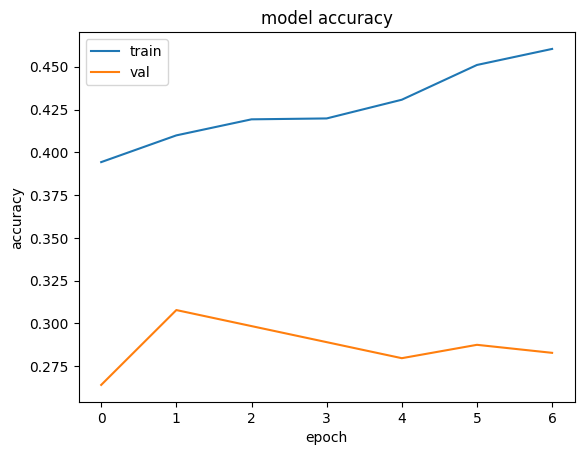

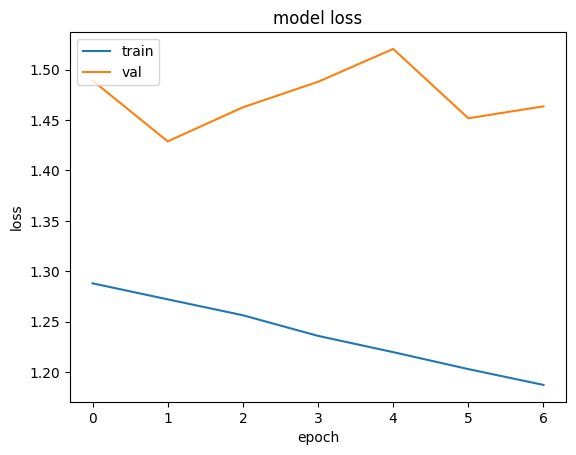

In [ ]:
# list all data in history
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
pretrained_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 640, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 640, 25)           7600      
                                                                 
 lstm_2 (LSTM)               (None, 640, 12)           1824      
                                                                 
 flatten (Flatten)           (None, 7680)              0         
                                                                 
 dense (Dense)               (None, 50)                384050    
                                                                 
 batch_normalization (Batch  (None, 50)                200       
 Normalization)                                                  
                                                        

In [ ]:
def run_model(n):
  SUB_PATH=f"/content/drive/MyDrive/data_eeg/data_eeg/Sub-{n}"
  sub_epochs = []

  # Iterate over files in the directory and process each EDF file

  for foldername, _, filenames in os.walk(SUB_PATH):
      for filename in filenames:
          if filename.endswith(".edf"):
              file_path = os.path.join(foldername, filename).replace("\\", "/")
              print("Processing file:", file_path)
              # Extract think epochs from the current file and append to the list
              epochs_data = extract_think_epochs(file_path)
              sub_epochs.append(epochs_data)

  # # # Concatenate all epochs into a single NumPy array
  all_sub_epochs_array = np.concatenate(sub_epochs, axis=0)

  # # # Check the shape of the resulting array
  print("Shape of all epochs array:", all_sub_epochs_array.shape)
  np.save(f"/content/drive/MyDrive/data_eeg/data_eeg/Sub-{n}/Sub_{n}_data",all_sub_epochs_array)
  #subject wise
  l=["LRUDRLDU","UDLRDURL","ULRDLDRU","LUDRURDL","DRLURLDU"]
  y_values=[]

  for j in l:
    for s in j:
      if s=="L":
          y_values.append(0)
      elif s=="R":
          y_values.append(1)
      elif s=="U":
          y_values.append(2)
      elif s=="D":
          y_values.append(3)

  y_val=np.array(y_values)
  print(y_val.shape)
  print(y_val)
  np.save(f"/content/drive/MyDrive/data_eeg/data_eeg/Sub-{n}/Sub_{n}_label",y_val)
  X_sub = np.load(f'/content/drive/MyDrive/data_eeg/data_eeg/Sub-{n}/Sub_{n}_data.npy')  # Replace with your file path
  Y_sub = np.load(f'/content/drive/MyDrive/data_eeg/data_eeg/Sub-{n}/Sub_{n}_label.npy')  # Replace with your file path

  # Ensure X_new and y_new are correctly shaped
  print(X_sub.shape)  # Should print (400, 8, 751)import numpy as np
  from sklearn.preprocessing import StandardScaler
  from sklearn.model_selection import train_test_split

  # Assume X_sub is your new dataset with shape (40, 8, 751)
  # Replace Y_sub with your actual labels

  # Step 1: Normalize the data
  X_reshaped = X_sub.reshape(-1, 1)  # Reshape the data to be 2D for fitting
  scaler = StandardScaler()
  X_scaled = scaler.fit_transform(X_reshaped)
  X_scaled = X_scaled.reshape(X_sub.shape)

  # Flatten each trial and channel to a 1D vector
  X_processed = []
  Y_processed = []

  for i in range(X_scaled.shape[0]):
      trial_data = X_scaled[i]
      trial_label = Y_sub[i]  # Assuming labels are in Y_sub
      # Iterate through channels
      for channel_data in trial_data:
          X_processed.append(channel_data)
          Y_processed.append(trial_label)

  # Convert lists to numpy arrays
  X_processed = np.array(X_processed)
  Y_processed = np.array(Y_processed)

  # The shape of X_processed should now be (40 * 8, 751) -> (320, 751)
  # We need to further reshape it to (320, 640, 1)
  X_processed_reshaped = X_processed[:, :640]  # Take the first 640 timesteps
  X_processed_reshaped = X_processed_reshaped.reshape(-1, 640, 1)

  # Correctly repeat the labels
  Y_processed_repeated = np.repeat(Y_sub, 8)  # Repeat each label 8 times for 8 channels

  # Verify the shapes
  print(X_processed_reshaped.shape)  # Expected: (320, 640, 1)
  print(Y_processed_repeated.shape)  # Expected: (320,)

  # Split the data into train, validation, and test sets
  X_train, X_test, y_train, y_test = train_test_split(X_processed_reshaped, Y_processed_repeated, test_size=0.2, random_state=42)
  X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

  print(X_train.shape, X_val.shape, X_test.shape)  # Verify the split sizes
  print(y_train.shape, y_val.shape, y_test.shape)

  print(Y_sub.shape)
  #@title transfer learning
  # Define early stopping and model checkpoint
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=1)
  checkpointer = tf.keras.callbacks.ModelCheckpoint(filepath='LSTM_model_finetuned.keras', monitor='val_accuracy', verbose=1, save_best_only=True)
  callbacks_list = [early_stopping, checkpointer]


  # Compile the model again to ensure it is ready for training
  pretrained_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

  # Train the model on the new dataset
  history = pretrained_model.fit(X_train, y_train,
                                batch_size=32, epochs=20, shuffle=False,
                                validation_data=(X_val, y_val),
                                callbacks=callbacks_list)

  # Evaluate the model
  loss, accuracy = pretrained_model.evaluate(X_test, y_test, verbose=0)
  print(f"Test Loss: {loss:.4f}")
  print(f"Test Accuracy: {accuracy * 100:.2f}%")
  model_save_path = f'/content/drive/MyDrive/data_eeg/data_eeg/model/LSTM_model_Sub_{n}.keras'
  pretrained_model.save(model_save_path)
  print(f"Model saved to {model_save_path}")
for i in range(1,11):
  run_model(i)

Processing file: /content/drive/MyDrive/data_eeg/data_eeg/Sub-1/Exp5/sub1_exp5.edf
Extracting EDF parameters from /content/drive/MyDrive/data_eeg/data_eeg/Sub-1/Exp5/sub1_exp5.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 32249  =      0.000 ...   128.996 secs...
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1651 samples (6.604 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter 

<ipython-input-42-b389e0ffbebe>:38: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  return epochs.get_data()


Using data from preloaded Raw for 8 events and 751 original time points ...
0 bad epochs dropped
Processing file: /content/drive/MyDrive/data_eeg/data_eeg/Sub-1/Exp4/sub1_exp4.edf
Extracting EDF parameters from /content/drive/MyDrive/data_eeg/data_eeg/Sub-1/Exp4/sub1_exp4.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 32249  =      0.000 ...   128.996 secs...
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1651 samples (6.604 s)

F

<ipython-input-42-b389e0ffbebe>:38: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  return epochs.get_data()
<ipython-input-42-b389e0ffbebe>:38: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  return epochs.get_data()


Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 32249  =      0.000 ...   128.996 secs...
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1651 samples (6.604 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopb

<ipython-input-42-b389e0ffbebe>:38: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  return epochs.get_data()


Used Annotations descriptions: ['Baseline Calculation started', 'Baseline calculation completed - Task 1 ', 'Task 10 started', 'Task 11 started', 'Task 12 started', 'Task 13 started', 'Task 14 started', 'Task 15 started', 'Task 16 started', 'Task 17 started', 'Task 18 started', 'Task 19 started', 'Task 2 started', 'Task 20 started', 'Task 21 started', 'Task 22 started', 'Task 23 started', 'Task 24 started', 'Task 25 started', 'Task 26 started', 'Task 27 started', 'Task 28 started', 'Task 29 started', 'Task 3 started', 'Task 30 started', 'Task 31 started', 'Task 32 started', 'Task 33 started', 'Task 34 started', 'Task 35 started', 'Task 36 started', 'Task 37 started', 'Task 38 started', 'Task 39 started', 'Task 4 started', 'Task 40 started', 'Task 41 started', 'Task 5 started', 'Task 6 started', 'Task 7 started', 'Task 8 started', 'Task 9 started', 'baseline', 'beep', 'down', 'left', 'rest', 'right', 'think', 'up']
Not setting metadata
8 matching events found
Applying baseline correctio

<ipython-input-42-b389e0ffbebe>:38: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  return epochs.get_data()


6/6 [==============================] - ETA: 0s - loss: 0.4592 - accuracy: 0.7708
Epoch 1: val_accuracy improved from -inf to 0.40625, saving model to LSTM_model_finetuned.keras
6/6 [==============================] - 12s 1s/step - loss: 0.4592 - accuracy: 0.7708 - val_loss: 1.2985 - val_accuracy: 0.4062
Epoch 2/20
6/6 [==============================] - ETA: 0s - loss: 0.4578 - accuracy: 0.7604
Epoch 2: val_accuracy did not improve from 0.40625
6/6 [==============================] - 4s 606ms/step - loss: 0.4578 - accuracy: 0.7604 - val_loss: 1.2366 - val_accuracy: 0.3906
Epoch 3/20
6/6 [==============================] - ETA: 0s - loss: 0.4513 - accuracy: 0.7552
Epoch 3: val_accuracy did not improve from 0.40625
6/6 [==============================] - 4s 668ms/step - loss: 0.4513 - accuracy: 0.7552 - val_loss: 1.2768 - val_accuracy: 0.4062
Epoch 4/20
6/6 [==============================] - ETA: 0s - loss: 0.4385 - accuracy: 0.7865
Epoch 4: val_accuracy improved from 0.40625 to 0.45312, savi

<ipython-input-42-b389e0ffbebe>:38: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  return epochs.get_data()


- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 825 samples (3.300 s)

Used Annotations descriptions: ['Task 10 started', 'Task 11 started', 'Task 12 started', 'Task 13 started', 'Task 14 started', 'Task 15 started', 'Task 16 started', 'Task 17 started', 'Task 18 started', 'Task 19 started', 'Task 2 started', 'Task 20 started', 'Task 21 started', 'Task 22 started', 'Task 23 started', 'Task 24 started', 'Task 25 started', 'Task 26 started', 'Task 27 started', 'Task 28 started', 'Task 29 started', 'Task 3 started', 'Task 30 started', 'Task 31 started', 'Task 32 started', 'Task 33 started', 'Task 34 started', 'Task 35 started', 'Task 36 started', 'Task 37 started', 'Task 38 started', 'Task 39 started', 'Task 4 started', 'Task 40 started', 'Task 41 started', 'Task 5 started', 'Task 6 started', 'Task 7 started', 'Task 8 started', 'Task 9 started'

<ipython-input-42-b389e0ffbebe>:38: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  return epochs.get_data()


---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 825 samples (3.300 s)

Used Annotations descriptions: ['Baseline Calculation started', 'Baseline calculation completed - Task 1 ', 'Task 10 started', 'Task 11 started', 'Task 12 started', 'Task 13 started', 'Task 14 started', 'Task 15 started', 'Task 16 started', 'Task 17 started', 'Task 18 started', 'Task 19 started', 'Task 2 started', 'Task 20 started', 'Task 21 started', 'Task 22 started', 'Task 23 started', 'Task 24 started', 'Task 25 started', 'Task 26 started', 'Task 27 started', 'Task 28 started', 'Task 29 started', 'Task 3 started', 'Task 30 started', 'Task

<ipython-input-42-b389e0ffbebe>:38: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  return epochs.get_data()


- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 825 samples (3.300 s)

Used Annotations descriptions: ['Baseline Calculation started', 'Baseline calculation completed - Task 1 ', 'Task 10 started', 'Task 11 started', 'Task 12 started', 'Task 13 started', 'Task 14 started', 'Task 15 started', 'Task 16 started', 'Task 17 started', 'Task 18 started', 'Task 19 started', 'Task 2 started', 'Task 20 started', 'Task 21 started', 'Task 22 started', 'Task 23 started', 'Task 24 started', 'Task 25 started', 'Task 26 started', 'Task 27 started', 'Task 28 started', 'Task 29 started', 'Task 3 started', 'Task 30 started', 'Task 31 started', 'Task 32 started', 'Task 33 started', 'Task 34 started', 'Task 35 started', 'Task 36 started', 'Task 37 started', 'Task 38 started', 'Task 39 started', 'Task 4 started', 'Task 40 started', 'Ta

<ipython-input-42-b389e0ffbebe>:38: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  return epochs.get_data()


Used Annotations descriptions: ['Baseline Calculation started', 'Baseline calculation completed - Task 1 ', 'Task 10 started', 'Task 11 started', 'Task 12 started', 'Task 13 started', 'Task 14 started', 'Task 15 started', 'Task 16 started', 'Task 17 started', 'Task 18 started', 'Task 19 started', 'Task 2 started', 'Task 20 started', 'Task 21 started', 'Task 22 started', 'Task 23 started', 'Task 24 started', 'Task 25 started', 'Task 26 started', 'Task 27 started', 'Task 28 started', 'Task 29 started', 'Task 3 started', 'Task 30 started', 'Task 31 started', 'Task 32 started', 'Task 33 started', 'Task 34 started', 'Task 35 started', 'Task 36 started', 'Task 37 started', 'Task 38 started', 'Task 39 started', 'Task 4 started', 'Task 40 started', 'Task 41 started', 'Task 5 started', 'Task 6 started', 'Task 7 started', 'Task 8 started', 'Task 9 started', 'baseline', 'beep', 'down', 'left', 'rest', 'right', 'think', 'up']
Not setting metadata
8 matching events found
Applying baseline correctio

<ipython-input-42-b389e0ffbebe>:38: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  return epochs.get_data()


Epoch 1/20
6/6 [==============================] - ETA: 0s - loss: 1.2999 - accuracy: 0.5677
Epoch 1: val_accuracy improved from -inf to 0.48438, saving model to LSTM_model_finetuned.keras
6/6 [==============================] - 16s 1s/step - loss: 1.2999 - accuracy: 0.5677 - val_loss: 2.0195 - val_accuracy: 0.4844
Epoch 2/20
6/6 [==============================] - ETA: 0s - loss: 0.5696 - accuracy: 0.7708
Epoch 2: val_accuracy improved from 0.48438 to 0.50000, saving model to LSTM_model_finetuned.keras
6/6 [==============================] - 5s 798ms/step - loss: 0.5696 - accuracy: 0.7708 - val_loss: 1.7181 - val_accuracy: 0.5000
Epoch 3/20
6/6 [==============================] - ETA: 0s - loss: 0.4276 - accuracy: 0.8281
Epoch 3: val_accuracy improved from 0.50000 to 0.51562, saving model to LSTM_model_finetuned.keras
6/6 [==============================] - 4s 698ms/step - loss: 0.4276 - accuracy: 0.8281 - val_loss: 1.4825 - val_accuracy: 0.5156
Epoch 4/20
6/6 [=============================

<ipython-input-42-b389e0ffbebe>:38: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  return epochs.get_data()


Used Annotations descriptions: ['Task 10 started', 'Task 11 started', 'Task 12 started', 'Task 13 started', 'Task 14 started', 'Task 15 started', 'Task 16 started', 'Task 17 started', 'Task 18 started', 'Task 19 started', 'Task 2 started', 'Task 20 started', 'Task 21 started', 'Task 22 started', 'Task 23 started', 'Task 24 started', 'Task 25 started', 'Task 26 started', 'Task 27 started', 'Task 28 started', 'Task 29 started', 'Task 3 started', 'Task 30 started', 'Task 31 started', 'Task 32 started', 'Task 33 started', 'Task 34 started', 'Task 35 started', 'Task 36 started', 'Task 37 started', 'Task 38 started', 'Task 39 started', 'Task 4 started', 'Task 40 started', 'Task 41 started', 'Task 5 started', 'Task 6 started', 'Task 7 started', 'Task 8 started', 'Task 9 started', 'beep', 'down', 'left', 'rest', 'right', 'think', 'up']
Not setting metadata
8 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 8 events a

<ipython-input-42-b389e0ffbebe>:38: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  return epochs.get_data()


- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 825 samples (3.300 s)

Used Annotations descriptions: ['Baseline Calculation started', 'Baseline calculation completed - Task 1 ', 'Task 10 started', 'Task 11 started', 'Task 12 started', 'Task 13 started', 'Task 14 started', 'Task 15 started', 'Task 16 started', 'Task 17 started', 'Task 18 started', 'Task 19 started', 'Task 2 started', 'Task 20 started', 'Task 21 started', 'Task 22 started', 'Task 23 started', 'Task 24 started', 'Task 25 started', 'Task 26 started', 'Task 27 started', 'Task 28 started', 'Task 29 started', 'Task 3 started', 'Task 30 started', 'Task 31 started', 'Task 32 started', 'Task 33 started', 'Task 34 started', 'Task 35 star

<ipython-input-42-b389e0ffbebe>:38: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  return epochs.get_data()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 825 samples (3.300 s)

Used Annotations descriptions: ['Baseline Calculation started', 'Baseline calculation completed - Task 1 ', 'Task 10 started', 'Task 11 started', 'Task 12 started', 'Task 13 started', 'Task 14 started', 'Task 15 started', 'Task 16 started', 'Task 17 started', 'Task 18 started', 'Task 19 started', 'Task 2 started', 'Task 20 started', 'Task 21 started', 'Task 22 started', 'Task 23 started', 'Task 24 started', 'Task 25 started', 'Task 26 

<ipython-input-42-b389e0ffbebe>:38: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  return epochs.get_data()


Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 825 samples (3.300 s)

Used Annotations descriptions: ['Baseline Calculation started', 'Baseline calculation completed - Task 1 ', 'Task 10 started', 'Task 11 started', 'Task 12 started', 'Task 13 started', 'Task 14 started', 'Task 15 started', 'Task 16 started', 'Task 17 started', 'Task 18 started', 'Task 19 started', 'Task 2 started', 'Task 20 started', 'Task 21 started', 'Task 22 started', 'Task 23 started', 'Task 24 started', 'Task 25 started', 'Task 26 started', 'Task 27 started', 'Task 28 started', 'Task 29 started', 'Task 3 started', 'Task 30 started', 'Task 31 started', 'Task 32

<ipython-input-42-b389e0ffbebe>:38: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  return epochs.get_data()


Epoch 1/20
6/6 [==============================] - ETA: 0s - loss: 1.7761 - accuracy: 0.3385
Epoch 1: val_accuracy improved from -inf to 0.23438, saving model to LSTM_model_finetuned.keras
6/6 [==============================] - 12s 935ms/step - loss: 1.7761 - accuracy: 0.3385 - val_loss: 1.6235 - val_accuracy: 0.2344
Epoch 2/20
6/6 [==============================] - ETA: 0s - loss: 1.2063 - accuracy: 0.4896
Epoch 2: val_accuracy improved from 0.23438 to 0.29688, saving model to LSTM_model_finetuned.keras
6/6 [==============================] - 5s 984ms/step - loss: 1.2063 - accuracy: 0.4896 - val_loss: 1.4438 - val_accuracy: 0.2969
Epoch 3/20
6/6 [==============================] - ETA: 0s - loss: 0.9390 - accuracy: 0.5885
Epoch 3: val_accuracy improved from 0.29688 to 0.34375, saving model to LSTM_model_finetuned.keras
6/6 [==============================] - 4s 684ms/step - loss: 0.9390 - accuracy: 0.5885 - val_loss: 1.4558 - val_accuracy: 0.3438
Epoch 4/20
6/6 [==========================

<ipython-input-42-b389e0ffbebe>:38: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  return epochs.get_data()


Used Annotations descriptions: ['Baseline Calculation started', 'Baseline calculation completed - Task 1 ', 'Task 10 started', 'Task 11 started', 'Task 12 started', 'Task 13 started', 'Task 14 started', 'Task 15 started', 'Task 16 started', 'Task 17 started', 'Task 18 started', 'Task 19 started', 'Task 2 started', 'Task 20 started', 'Task 21 started', 'Task 22 started', 'Task 23 started', 'Task 24 started', 'Task 25 started', 'Task 26 started', 'Task 27 started', 'Task 28 started', 'Task 29 started', 'Task 3 started', 'Task 30 started', 'Task 31 started', 'Task 32 started', 'Task 33 started', 'Task 34 started', 'Task 35 started', 'Task 36 started', 'Task 37 started', 'Task 38 started', 'Task 39 started', 'Task 4 started', 'Task 40 started', 'Task 41 started', 'Task 5 started', 'Task 6 started', 'Task 7 started', 'Task 8 started', 'Task 9 started', 'baseline', 'beep', 'down', 'left', 'rest', 'right', 'think', 'up']
Not setting metadata
8 matching events found
Applying baseline correctio

<ipython-input-42-b389e0ffbebe>:38: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  return epochs.get_data()


Used Annotations descriptions: ['Baseline Calculation started', 'Baseline calculation completed - Task 1 ', 'Task 10 started', 'Task 11 started', 'Task 12 started', 'Task 13 started', 'Task 14 started', 'Task 15 started', 'Task 16 started', 'Task 17 started', 'Task 18 started', 'Task 19 started', 'Task 2 started', 'Task 20 started', 'Task 21 started', 'Task 22 started', 'Task 23 started', 'Task 24 started', 'Task 25 started', 'Task 26 started', 'Task 27 started', 'Task 28 started', 'Task 29 started', 'Task 3 started', 'Task 30 started', 'Task 31 started', 'Task 32 started', 'Task 33 started', 'Task 34 started', 'Task 35 started', 'Task 36 started', 'Task 37 started', 'Task 38 started', 'Task 39 started', 'Task 4 started', 'Task 40 started', 'Task 41 started', 'Task 5 started', 'Task 6 started', 'Task 7 started', 'Task 8 started', 'Task 9 started', 'baseline', 'beep', 'down', 'left', 'rest', 'right', 'think', 'up']
Not setting metadata
8 matching events found
Applying baseline correctio

<ipython-input-42-b389e0ffbebe>:38: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  return epochs.get_data()


Used Annotations descriptions: ['Baseline Calculation started', 'Baseline calculation completed - Task 1 ', 'Task 10 started', 'Task 11 started', 'Task 12 started', 'Task 13 started', 'Task 14 started', 'Task 15 started', 'Task 16 started', 'Task 17 started', 'Task 18 started', 'Task 19 started', 'Task 2 started', 'Task 20 started', 'Task 21 started', 'Task 22 started', 'Task 23 started', 'Task 24 started', 'Task 25 started', 'Task 26 started', 'Task 27 started', 'Task 28 started', 'Task 29 started', 'Task 3 started', 'Task 30 started', 'Task 31 started', 'Task 32 started', 'Task 33 started', 'Task 34 started', 'Task 35 started', 'Task 36 started', 'Task 37 started', 'Task 38 started', 'Task 39 started', 'Task 4 started', 'Task 40 started', 'Task 41 started', 'Task 5 started', 'Task 6 started', 'Task 7 started', 'Task 8 started', 'Task 9 started', 'baseline', 'beep', 'down', 'left', 'rest', 'right', 'think', 'up']
Not setting metadata
8 matching events found
Applying baseline correctio

<ipython-input-42-b389e0ffbebe>:38: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  return epochs.get_data()


Used Annotations descriptions: ['Baseline Calculation started', 'Baseline calculation completed - Task 1 ', 'Task 10 started', 'Task 11 started', 'Task 12 started', 'Task 13 started', 'Task 14 started', 'Task 15 started', 'Task 16 started', 'Task 17 started', 'Task 18 started', 'Task 19 started', 'Task 2 started', 'Task 20 started', 'Task 21 started', 'Task 22 started', 'Task 23 started', 'Task 24 started', 'Task 25 started', 'Task 26 started', 'Task 27 started', 'Task 28 started', 'Task 29 started', 'Task 3 started', 'Task 30 started', 'Task 31 started', 'Task 32 started', 'Task 33 started', 'Task 34 started', 'Task 35 started', 'Task 36 started', 'Task 37 started', 'Task 38 started', 'Task 39 started', 'Task 4 started', 'Task 40 started', 'Task 41 started', 'Task 5 started', 'Task 6 started', 'Task 7 started', 'Task 8 started', 'Task 9 started', 'baseline', 'beep', 'down', 'left', 'rest', 'right', 'think', 'up']
Not setting metadata
8 matching events found
Applying baseline correctio

<ipython-input-42-b389e0ffbebe>:38: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  return epochs.get_data()


6/6 [==============================] - ETA: 0s - loss: 1.6175 - accuracy: 0.4427
Epoch 1: val_accuracy improved from -inf to 0.32812, saving model to LSTM_model_finetuned.keras
6/6 [==============================] - 12s 933ms/step - loss: 1.6175 - accuracy: 0.4427 - val_loss: 1.9856 - val_accuracy: 0.3281
Epoch 2/20
6/6 [==============================] - ETA: 0s - loss: 0.7580 - accuracy: 0.6979
Epoch 2: val_accuracy did not improve from 0.32812
6/6 [==============================] - 4s 648ms/step - loss: 0.7580 - accuracy: 0.6979 - val_loss: 1.9625 - val_accuracy: 0.3125
Epoch 3/20
6/6 [==============================] - ETA: 0s - loss: 0.5771 - accuracy: 0.7500
Epoch 3: val_accuracy improved from 0.32812 to 0.35938, saving model to LSTM_model_finetuned.keras
6/6 [==============================] - 6s 970ms/step - loss: 0.5771 - accuracy: 0.7500 - val_loss: 1.8699 - val_accuracy: 0.3594
Epoch 4/20
6/6 [==============================] - ETA: 0s - loss: 0.4676 - accuracy: 0.8021
Epoch 4: 

<ipython-input-42-b389e0ffbebe>:38: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  return epochs.get_data()


Not setting metadata
8 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 8 events and 751 original time points ...
0 bad epochs dropped
Processing file: /content/drive/MyDrive/data_eeg/data_eeg/Sub-5/Exp4/sub5_exp4.edf
Extracting EDF parameters from /content/drive/MyDrive/data_eeg/data_eeg/Sub-5/Exp4/sub5_exp4.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 32249  =      0.000 ...   128.996 secs...
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- 

<ipython-input-42-b389e0ffbebe>:38: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  return epochs.get_data()


0 projection items activated
Using data from preloaded Raw for 8 events and 751 original time points ...
0 bad epochs dropped
Processing file: /content/drive/MyDrive/data_eeg/data_eeg/Sub-5/Exp5/sub5_exp5.edf
Extracting EDF parameters from /content/drive/MyDrive/data_eeg/data_eeg/Sub-5/Exp5/sub5_exp5.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 32249  =      0.000 ...   128.996 secs...
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter leng

<ipython-input-42-b389e0ffbebe>:38: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  return epochs.get_data()


Used Annotations descriptions: ['Baseline Calculation started', 'Baseline calculation completed - Task 1 ', 'Task 10 started', 'Task 11 started', 'Task 12 started', 'Task 13 started', 'Task 14 started', 'Task 15 started', 'Task 16 started', 'Task 17 started', 'Task 18 started', 'Task 19 started', 'Task 2 started', 'Task 20 started', 'Task 21 started', 'Task 22 started', 'Task 23 started', 'Task 24 started', 'Task 25 started', 'Task 26 started', 'Task 27 started', 'Task 28 started', 'Task 29 started', 'Task 3 started', 'Task 30 started', 'Task 31 started', 'Task 32 started', 'Task 33 started', 'Task 34 started', 'Task 35 started', 'Task 36 started', 'Task 37 started', 'Task 38 started', 'Task 39 started', 'Task 4 started', 'Task 40 started', 'Task 41 started', 'Task 5 started', 'Task 6 started', 'Task 7 started', 'Task 8 started', 'Task 9 started', 'baseline', 'beep', 'down', 'left', 'rest', 'right', 'think', 'up']
Not setting metadata
8 matching events found
Applying baseline correctio

<ipython-input-42-b389e0ffbebe>:38: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  return epochs.get_data()


Used Annotations descriptions: ['Baseline Calculation started', 'Baseline calculation completed - Task 1 ', 'Task 10 started', 'Task 11 started', 'Task 12 started', 'Task 13 started', 'Task 14 started', 'Task 15 started', 'Task 16 started', 'Task 17 started', 'Task 18 started', 'Task 19 started', 'Task 2 started', 'Task 20 started', 'Task 21 started', 'Task 22 started', 'Task 23 started', 'Task 24 started', 'Task 25 started', 'Task 26 started', 'Task 27 started', 'Task 28 started', 'Task 29 started', 'Task 3 started', 'Task 30 started', 'Task 31 started', 'Task 32 started', 'Task 33 started', 'Task 34 started', 'Task 35 started', 'Task 36 started', 'Task 37 started', 'Task 38 started', 'Task 39 started', 'Task 4 started', 'Task 40 started', 'Task 41 started', 'Task 5 started', 'Task 6 started', 'Task 7 started', 'Task 8 started', 'Task 9 started', 'baseline', 'beep', 'down', 'left', 'rest', 'right', 'think', 'up']
Not setting metadata
8 matching events found
Applying baseline correctio

<ipython-input-42-b389e0ffbebe>:38: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  return epochs.get_data()


Epoch 1/20
6/6 [==============================] - ETA: 0s - loss: 1.3680 - accuracy: 0.5469
Epoch 1: val_accuracy improved from -inf to 0.31250, saving model to LSTM_model_finetuned.keras
6/6 [==============================] - 12s 924ms/step - loss: 1.3680 - accuracy: 0.5469 - val_loss: 2.3658 - val_accuracy: 0.3125
Epoch 2/20
6/6 [==============================] - ETA: 0s - loss: 0.6031 - accuracy: 0.7500
Epoch 2: val_accuracy did not improve from 0.31250
6/6 [==============================] - 4s 662ms/step - loss: 0.6031 - accuracy: 0.7500 - val_loss: 2.1529 - val_accuracy: 0.2500
Epoch 3/20
6/6 [==============================] - ETA: 0s - loss: 0.5009 - accuracy: 0.7865
Epoch 3: val_accuracy did not improve from 0.31250
6/6 [==============================] - 6s 996ms/step - loss: 0.5009 - accuracy: 0.7865 - val_loss: 2.0392 - val_accuracy: 0.2500
Epoch 4/20
6/6 [==============================] - ETA: 0s - loss: 0.4439 - accuracy: 0.8333
Epoch 4: val_accuracy did not improve from 0.3

<ipython-input-42-b389e0ffbebe>:38: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  return epochs.get_data()


Used Annotations descriptions: ['Baseline Calculation started', 'Baseline calculation completed - Task 1 ', 'Task 10 started', 'Task 11 started', 'Task 12 started', 'Task 13 started', 'Task 14 started', 'Task 15 started', 'Task 16 started', 'Task 17 started', 'Task 18 started', 'Task 19 started', 'Task 2 started', 'Task 20 started', 'Task 21 started', 'Task 22 started', 'Task 23 started', 'Task 24 started', 'Task 25 started', 'Task 26 started', 'Task 27 started', 'Task 28 started', 'Task 29 started', 'Task 3 started', 'Task 30 started', 'Task 31 started', 'Task 32 started', 'Task 33 started', 'Task 34 started', 'Task 35 started', 'Task 36 started', 'Task 37 started', 'Task 38 started', 'Task 39 started', 'Task 4 started', 'Task 40 started', 'Task 41 started', 'Task 5 started', 'Task 6 started', 'Task 7 started', 'Task 8 started', 'Task 9 started', 'baseline', 'beep', 'down', 'left', 'rest', 'right', 'think', 'up']
Not setting metadata
8 matching events found
Applying baseline correctio

<ipython-input-42-b389e0ffbebe>:38: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  return epochs.get_data()


Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 825 samples (3.300 s)

Used Annotations descriptions: ['Baseline Calculation started', 'Baseline calculation completed - Task 1 ', 'Task 10 started', 'Task 11 started', 'Task 12 started', 'Task 13 started', 'Task 14 started', 'Task 15 started', 'Task 16 started', 'Task 17 started', 'Task 18 started', 'Task 19 started', 'Task 2 started', 'Task 20 started', 'Task 21 started', 'Task 22 started', 'Task 23 started', 'Task 24 started', 'Task 25 started', 'Task 26 started', 'Task 27 started', 'Task 28 started', 'Task 29 started', 'Task 3 started', 'Task 30 started', 'Task 31 started', 'Task 32

<ipython-input-42-b389e0ffbebe>:38: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  return epochs.get_data()


Used Annotations descriptions: ['Baseline Calculation started', 'Baseline calculation completed - Task 1 ', 'Task 10 started', 'Task 11 started', 'Task 12 started', 'Task 13 started', 'Task 14 started', 'Task 15 started', 'Task 16 started', 'Task 17 started', 'Task 18 started', 'Task 19 started', 'Task 2 started', 'Task 20 started', 'Task 21 started', 'Task 22 started', 'Task 23 started', 'Task 24 started', 'Task 25 started', 'Task 26 started', 'Task 27 started', 'Task 28 started', 'Task 29 started', 'Task 3 started', 'Task 30 started', 'Task 31 started', 'Task 32 started', 'Task 33 started', 'Task 34 started', 'Task 35 started', 'Task 36 started', 'Task 37 started', 'Task 38 started', 'Task 39 started', 'Task 4 started', 'Task 40 started', 'Task 41 started', 'Task 5 started', 'Task 6 started', 'Task 7 started', 'Task 8 started', 'Task 9 started', 'baseline', 'beep', 'down', 'left', 'rest', 'right', 'think', 'up']
Not setting metadata
8 matching events found
Applying baseline correctio

<ipython-input-42-b389e0ffbebe>:38: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  return epochs.get_data()


- Filter length: 825 samples (3.300 s)

Used Annotations descriptions: ['Baseline Calculation started', 'Baseline calculation completed - Task 1 ', 'Task 10 started', 'Task 11 started', 'Task 12 started', 'Task 13 started', 'Task 14 started', 'Task 15 started', 'Task 16 started', 'Task 17 started', 'Task 18 started', 'Task 19 started', 'Task 2 started', 'Task 20 started', 'Task 21 started', 'Task 22 started', 'Task 23 started', 'Task 24 started', 'Task 25 started', 'Task 26 started', 'Task 27 started', 'Task 28 started', 'Task 29 started', 'Task 3 started', 'Task 30 started', 'Task 31 started', 'Task 32 started', 'Task 33 started', 'Task 34 started', 'Task 35 started', 'Task 36 started', 'Task 37 started', 'Task 38 started', 'Task 39 started', 'Task 4 started', 'Task 40 started', 'Task 41 started', 'Task 5 started', 'Task 6 started', 'Task 7 started', 'Task 8 started', 'Task 9 started', 'baseline', 'beep', 'down', 'left', 'rest', 'right', 'think', 'up']
Not setting metadata
8 matching 

<ipython-input-42-b389e0ffbebe>:38: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  return epochs.get_data()


6/6 [==============================] - ETA: 0s - loss: 1.4545 - accuracy: 0.4792
Epoch 1: val_accuracy improved from -inf to 0.28125, saving model to LSTM_model_finetuned.keras
6/6 [==============================] - 13s 1s/step - loss: 1.4545 - accuracy: 0.4792 - val_loss: 1.9500 - val_accuracy: 0.2812
Epoch 2/20
6/6 [==============================] - ETA: 0s - loss: 0.8197 - accuracy: 0.6719
Epoch 2: val_accuracy did not improve from 0.28125
6/6 [==============================] - 4s 675ms/step - loss: 0.8197 - accuracy: 0.6719 - val_loss: 1.8496 - val_accuracy: 0.2812
Epoch 3/20
6/6 [==============================] - ETA: 0s - loss: 0.6375 - accuracy: 0.7708
Epoch 3: val_accuracy did not improve from 0.28125
6/6 [==============================] - 4s 606ms/step - loss: 0.6375 - accuracy: 0.7708 - val_loss: 1.8398 - val_accuracy: 0.2812
Epoch 4/20
6/6 [==============================] - ETA: 0s - loss: 0.5033 - accuracy: 0.7969
Epoch 4: val_accuracy did not improve from 0.28125
6/6 [====

<ipython-input-42-b389e0ffbebe>:38: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  return epochs.get_data()


- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 825 samples (3.300 s)

Used Annotations descriptions: ['Baseline Calculation started', 'Baseline calculation completed - Task 1 ', 'Task 10 started', 'Task 11 started', 'Task 12 started', 'Task 13 started', 'Task 14 started', 'Task 15 started', 'Task 16 started', 'Task 17 started', 'Task 18 started', 'Task 19 started', 'Task 2 started', 'Task 20 started', 'Task 21 started', 'Task 22 started', 'Task 23 started', 'Task 24 started', 'Task 25 started', 'Task 26 started', 'Task 27 started', 'Task 28 started', 'Task 29 started', 'Task 3 started', 'Task 30 started', 'Task 31 started', 'Task 32 started', 'Task 33 started', 'Task 34 started', 'Task 35 started', 'Task 36 started', 'Task 37 started', 'Task 38 started', 'Task 39 started', 'Task 4 started', 'Task 40 started', 'Task 41 started', 'Task 5 star

<ipython-input-42-b389e0ffbebe>:38: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  return epochs.get_data()


- Filter length: 825 samples (3.300 s)

Used Annotations descriptions: ['Baseline Calculation started', 'Baseline calculation completed - Task 1 ', 'Task 10 started', 'Task 11 started', 'Task 12 started', 'Task 13 started', 'Task 14 started', 'Task 15 started', 'Task 16 started', 'Task 17 started', 'Task 18 started', 'Task 19 started', 'Task 2 started', 'Task 20 started', 'Task 21 started', 'Task 22 started', 'Task 23 started', 'Task 24 started', 'Task 25 started', 'Task 26 started', 'Task 27 started', 'Task 28 started', 'Task 29 started', 'Task 3 started', 'Task 30 started', 'Task 31 started', 'Task 32 started', 'Task 33 started', 'Task 34 started', 'Task 35 started', 'Task 36 started', 'Task 37 started', 'Task 38 started', 'Task 39 started', 'Task 4 started', 'Task 40 started', 'Task 41 started', 'Task 5 started', 'Task 6 started', 'Task 7 started', 'Task 8 started', 'Task 9 started', 'baseline', 'beep', 'down', 'left', 'rest', 'right', 'think', 'up']
Not setting metadata
8 matching 

<ipython-input-42-b389e0ffbebe>:38: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  return epochs.get_data()


Not setting metadata
8 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 8 events and 751 original time points ...
0 bad epochs dropped
Processing file: /content/drive/MyDrive/data_eeg/data_eeg/Sub-7/Exp3/sub7_exp3.edf
Extracting EDF parameters from /content/drive/MyDrive/data_eeg/data_eeg/Sub-7/Exp3/sub7_exp3.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 32249  =      0.000 ...   128.996 secs...
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- 

<ipython-input-42-b389e0ffbebe>:38: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  return epochs.get_data()


Used Annotations descriptions: ['Task 10 started', 'Task 11 started', 'Task 12 started', 'Task 13 started', 'Task 14 started', 'Task 15 started', 'Task 16 started', 'Task 17 started', 'Task 18 started', 'Task 19 started', 'Task 2 started', 'Task 20 started', 'Task 21 started', 'Task 22 started', 'Task 23 started', 'Task 24 started', 'Task 25 started', 'Task 26 started', 'Task 27 started', 'Task 28 started', 'Task 29 started', 'Task 3 started', 'Task 30 started', 'Task 31 started', 'Task 32 started', 'Task 33 started', 'Task 34 started', 'Task 35 started', 'Task 36 started', 'Task 37 started', 'Task 38 started', 'Task 39 started', 'Task 4 started', 'Task 40 started', 'Task 41 started', 'Task 5 started', 'Task 6 started', 'Task 7 started', 'Task 8 started', 'Task 9 started', 'beep', 'down', 'left', 'rest', 'right', 'think', 'up']
Not setting metadata
8 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 8 events a

<ipython-input-42-b389e0ffbebe>:38: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  return epochs.get_data()


Epoch 1/20
6/6 [==============================] - ETA: 0s - loss: 2.0938 - accuracy: 0.2708
Epoch 1: val_accuracy improved from -inf to 0.20312, saving model to LSTM_model_finetuned.keras
6/6 [==============================] - 15s 1s/step - loss: 2.0938 - accuracy: 0.2708 - val_loss: 2.4200 - val_accuracy: 0.2031
Epoch 2/20
6/6 [==============================] - ETA: 0s - loss: 1.3183 - accuracy: 0.4688
Epoch 2: val_accuracy did not improve from 0.20312
6/6 [==============================] - 5s 964ms/step - loss: 1.3183 - accuracy: 0.4688 - val_loss: 2.3380 - val_accuracy: 0.1875
Epoch 3/20
6/6 [==============================] - ETA: 0s - loss: 1.1158 - accuracy: 0.5312
Epoch 3: val_accuracy did not improve from 0.20312
6/6 [==============================] - 4s 681ms/step - loss: 1.1158 - accuracy: 0.5312 - val_loss: 2.1990 - val_accuracy: 0.2031
Epoch 4/20
6/6 [==============================] - ETA: 0s - loss: 0.9200 - accuracy: 0.6354
Epoch 4: val_accuracy did not improve from 0.2031

<ipython-input-42-b389e0ffbebe>:38: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  return epochs.get_data()


Used Annotations descriptions: ['Baseline Calculation started', 'Baseline calculation completed - Task 1 ', 'Task 10 started', 'Task 11 started', 'Task 12 started', 'Task 13 started', 'Task 14 started', 'Task 15 started', 'Task 16 started', 'Task 17 started', 'Task 18 started', 'Task 19 started', 'Task 2 started', 'Task 20 started', 'Task 21 started', 'Task 22 started', 'Task 23 started', 'Task 24 started', 'Task 25 started', 'Task 26 started', 'Task 27 started', 'Task 28 started', 'Task 29 started', 'Task 3 started', 'Task 30 started', 'Task 31 started', 'Task 32 started', 'Task 33 started', 'Task 34 started', 'Task 35 started', 'Task 36 started', 'Task 37 started', 'Task 38 started', 'Task 39 started', 'Task 4 started', 'Task 40 started', 'Task 41 started', 'Task 5 started', 'Task 6 started', 'Task 7 started', 'Task 8 started', 'Task 9 started', 'baseline', 'beep', 'down', 'left', 'rest', 'right', 'think', 'up']
Not setting metadata
8 matching events found
Applying baseline correctio

<ipython-input-42-b389e0ffbebe>:38: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  return epochs.get_data()


Used Annotations descriptions: ['Baseline Calculation started', 'Baseline calculation completed - Task 1 ', 'Task 10 started', 'Task 11 started', 'Task 12 started', 'Task 13 started', 'Task 14 started', 'Task 15 started', 'Task 16 started', 'Task 17 started', 'Task 18 started', 'Task 19 started', 'Task 2 started', 'Task 20 started', 'Task 21 started', 'Task 22 started', 'Task 23 started', 'Task 24 started', 'Task 25 started', 'Task 26 started', 'Task 27 started', 'Task 28 started', 'Task 29 started', 'Task 3 started', 'Task 30 started', 'Task 31 started', 'Task 32 started', 'Task 33 started', 'Task 34 started', 'Task 35 started', 'Task 36 started', 'Task 37 started', 'Task 38 started', 'Task 39 started', 'Task 4 started', 'Task 40 started', 'Task 41 started', 'Task 5 started', 'Task 6 started', 'Task 7 started', 'Task 8 started', 'Task 9 started', 'baseline', 'beep', 'down', 'left', 'rest', 'right', 'think', 'up']
Not setting metadata
8 matching events found
Applying baseline correctio

<ipython-input-42-b389e0ffbebe>:38: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  return epochs.get_data()


Used Annotations descriptions: ['Baseline Calculation started', 'Baseline calculation completed - Task 1 ', 'Task 10 started', 'Task 11 started', 'Task 12 started', 'Task 13 started', 'Task 14 started', 'Task 15 started', 'Task 16 started', 'Task 17 started', 'Task 18 started', 'Task 19 started', 'Task 2 started', 'Task 20 started', 'Task 21 started', 'Task 22 started', 'Task 23 started', 'Task 24 started', 'Task 25 started', 'Task 26 started', 'Task 27 started', 'Task 28 started', 'Task 29 started', 'Task 3 started', 'Task 30 started', 'Task 31 started', 'Task 32 started', 'Task 33 started', 'Task 34 started', 'Task 35 started', 'Task 36 started', 'Task 37 started', 'Task 38 started', 'Task 39 started', 'Task 4 started', 'Task 40 started', 'Task 41 started', 'Task 5 started', 'Task 6 started', 'Task 7 started', 'Task 8 started', 'Task 9 started', 'baseline', 'beep', 'down', 'left', 'rest', 'right', 'think', 'up']
Not setting metadata
8 matching events found
Applying baseline correctio

<ipython-input-42-b389e0ffbebe>:38: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  return epochs.get_data()


Used Annotations descriptions: ['Baseline Calculation started', 'Baseline calculation completed - Task 1 ', 'Task 10 started', 'Task 11 started', 'Task 12 started', 'Task 13 started', 'Task 14 started', 'Task 15 started', 'Task 16 started', 'Task 17 started', 'Task 18 started', 'Task 19 started', 'Task 2 started', 'Task 20 started', 'Task 21 started', 'Task 22 started', 'Task 23 started', 'Task 24 started', 'Task 25 started', 'Task 26 started', 'Task 27 started', 'Task 28 started', 'Task 29 started', 'Task 3 started', 'Task 30 started', 'Task 31 started', 'Task 32 started', 'Task 33 started', 'Task 34 started', 'Task 35 started', 'Task 36 started', 'Task 37 started', 'Task 38 started', 'Task 39 started', 'Task 4 started', 'Task 40 started', 'Task 41 started', 'Task 5 started', 'Task 6 started', 'Task 7 started', 'Task 8 started', 'Task 9 started', 'baseline', 'beep', 'down', 'left', 'rest', 'right', 'think', 'up']
Not setting metadata
8 matching events found
Applying baseline correctio

<ipython-input-42-b389e0ffbebe>:38: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  return epochs.get_data()


Epoch 1/20
6/6 [==============================] - ETA: 0s - loss: 1.2086 - accuracy: 0.4948
Epoch 1: val_accuracy improved from -inf to 0.29688, saving model to LSTM_model_finetuned.keras
6/6 [==============================] - 13s 1s/step - loss: 1.2086 - accuracy: 0.4948 - val_loss: 1.8486 - val_accuracy: 0.2969
Epoch 2/20
6/6 [==============================] - ETA: 0s - loss: 0.7209 - accuracy: 0.6927
Epoch 2: val_accuracy improved from 0.29688 to 0.34375, saving model to LSTM_model_finetuned.keras
6/6 [==============================] - 4s 622ms/step - loss: 0.7209 - accuracy: 0.6927 - val_loss: 1.8527 - val_accuracy: 0.3438
Epoch 3/20
6/6 [==============================] - ETA: 0s - loss: 0.5633 - accuracy: 0.7812
Epoch 3: val_accuracy did not improve from 0.34375
6/6 [==============================] - 4s 660ms/step - loss: 0.5633 - accuracy: 0.7812 - val_loss: 1.8378 - val_accuracy: 0.2812
Epoch 4/20
6/6 [==============================] - ETA: 0s - loss: 0.4960 - accuracy: 0.8073
E

<ipython-input-42-b389e0ffbebe>:38: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  return epochs.get_data()


Used Annotations descriptions: ['Baseline Calculation started', 'Baseline calculation completed - Task 1 ', 'Task 10 started', 'Task 11 started', 'Task 12 started', 'Task 13 started', 'Task 14 started', 'Task 15 started', 'Task 16 started', 'Task 17 started', 'Task 18 started', 'Task 19 started', 'Task 2 started', 'Task 20 started', 'Task 21 started', 'Task 22 started', 'Task 23 started', 'Task 24 started', 'Task 25 started', 'Task 26 started', 'Task 27 started', 'Task 28 started', 'Task 29 started', 'Task 3 started', 'Task 30 started', 'Task 31 started', 'Task 32 started', 'Task 33 started', 'Task 34 started', 'Task 35 started', 'Task 36 started', 'Task 37 started', 'Task 38 started', 'Task 39 started', 'Task 4 started', 'Task 40 started', 'Task 41 started', 'Task 5 started', 'Task 6 started', 'Task 7 started', 'Task 8 started', 'Task 9 started', 'baseline', 'beep', 'down', 'left', 'rest', 'right', 'think', 'up']
Not setting metadata
8 matching events found
Applying baseline correctio

<ipython-input-42-b389e0ffbebe>:38: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  return epochs.get_data()


Used Annotations descriptions: ['Baseline Calculation started', 'Baseline calculation completed - Task 1 ', 'Task 10 started', 'Task 11 started', 'Task 12 started', 'Task 13 started', 'Task 14 started', 'Task 15 started', 'Task 16 started', 'Task 17 started', 'Task 18 started', 'Task 19 started', 'Task 2 started', 'Task 20 started', 'Task 21 started', 'Task 22 started', 'Task 23 started', 'Task 24 started', 'Task 25 started', 'Task 26 started', 'Task 27 started', 'Task 28 started', 'Task 29 started', 'Task 3 started', 'Task 30 started', 'Task 31 started', 'Task 32 started', 'Task 33 started', 'Task 34 started', 'Task 35 started', 'Task 36 started', 'Task 37 started', 'Task 38 started', 'Task 39 started', 'Task 4 started', 'Task 40 started', 'Task 41 started', 'Task 5 started', 'Task 6 started', 'Task 7 started', 'Task 8 started', 'Task 9 started', 'baseline', 'beep', 'down', 'left', 'rest', 'right', 'think', 'up']
Not setting metadata
8 matching events found
Applying baseline correctio

<ipython-input-42-b389e0ffbebe>:38: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  return epochs.get_data()


- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 825 samples (3.300 s)

Used Annotations descriptions: ['Baseline Calculation started', 'Baseline calculation completed - Task 1 ', 'Task 10 started', 'Task 11 started', 'Task 12 started', 'Task 13 started', 'Task 14 started', 'Task 15 started', 'Task 16 started', 'Task 17 started', 'Task 18 started', 'Task 19 started', 'Task 2 started', 'Task 20 started', 'Task 21 started', 'Task 22 started', 'Task 23 started', 'Task 24 started', 'Task 25 started', 'Task 26 started', 'Task 27 started', 'Task 28 started', 'Task 29 started', 'Task 3 started', 'Task 30 started', 'Task 31 started', 'Task 32 started', 'Task 33 started', 'Task 34 started', 'Task 35 star

<ipython-input-42-b389e0ffbebe>:38: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  return epochs.get_data()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 825 samples (3.300 s)

Used Annotations descriptions: ['Task 10 started', 'Task 11 started', 'Task 12 started', 'Task 13 started', 'Task 14 started', 'Task 15 started', 'Task 16 started', 'Task 17 started', 'Task 18 started', 'Task 19 started', 'Task 2 started', 'Task 20 started', 'Task 21 started', 'Task 22 started', 'Task 23 started', 'Task 24 started', 'Task 25 started', 'Task 26 started', 'Task 27 started', 'Task 28 started', 'Task 29 started', 'Task 3 s

<ipython-input-42-b389e0ffbebe>:38: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  return epochs.get_data()


Epoch 1/20
6/6 [==============================] - ETA: 0s - loss: 1.1847 - accuracy: 0.5781
Epoch 1: val_accuracy improved from -inf to 0.40625, saving model to LSTM_model_finetuned.keras
6/6 [==============================] - 12s 926ms/step - loss: 1.1847 - accuracy: 0.5781 - val_loss: 1.5931 - val_accuracy: 0.4062
Epoch 2/20
6/6 [==============================] - ETA: 0s - loss: 0.6863 - accuracy: 0.7135
Epoch 2: val_accuracy did not improve from 0.40625
6/6 [==============================] - 4s 698ms/step - loss: 0.6863 - accuracy: 0.7135 - val_loss: 1.4916 - val_accuracy: 0.3906
Epoch 3/20
6/6 [==============================] - ETA: 0s - loss: 0.4986 - accuracy: 0.7812
Epoch 3: val_accuracy did not improve from 0.40625
6/6 [==============================] - 5s 842ms/step - loss: 0.4986 - accuracy: 0.7812 - val_loss: 1.4582 - val_accuracy: 0.3906
Epoch 4/20
6/6 [==============================] - ETA: 0s - loss: 0.4437 - accuracy: 0.8073
Epoch 4: val_accuracy improved from 0.40625 to

<ipython-input-42-b389e0ffbebe>:38: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  return epochs.get_data()


0 bad epochs dropped
Processing file: /content/drive/MyDrive/data_eeg/data_eeg/Sub-10/Exp4/sub10_exp4.edf
Extracting EDF parameters from /content/drive/MyDrive/data_eeg/data_eeg/Sub-10/Exp4/sub10_exp4.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 32249  =      0.000 ...   128.996 secs...
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1651 samples (6.604 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter fr

<ipython-input-42-b389e0ffbebe>:38: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  return epochs.get_data()


Used Annotations descriptions: ['Task 10 started', 'Task 11 started', 'Task 12 started', 'Task 13 started', 'Task 14 started', 'Task 15 started', 'Task 16 started', 'Task 17 started', 'Task 18 started', 'Task 19 started', 'Task 2 started', 'Task 20 started', 'Task 21 started', 'Task 22 started', 'Task 23 started', 'Task 24 started', 'Task 25 started', 'Task 26 started', 'Task 27 started', 'Task 28 started', 'Task 29 started', 'Task 3 started', 'Task 30 started', 'Task 31 started', 'Task 32 started', 'Task 33 started', 'Task 34 started', 'Task 35 started', 'Task 36 started', 'Task 37 started', 'Task 38 started', 'Task 39 started', 'Task 4 started', 'Task 40 started', 'Task 41 started', 'Task 5 started', 'Task 6 started', 'Task 7 started', 'Task 8 started', 'Task 9 started', 'beep', 'down', 'left', 'rest', 'right', 'think', 'up']
Not setting metadata
8 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 8 events a

<ipython-input-42-b389e0ffbebe>:38: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  return epochs.get_data()


Used Annotations descriptions: ['Baseline Calculation started', 'Baseline calculation completed - Task 1 ', 'Task 10 started', 'Task 11 started', 'Task 12 started', 'Task 13 started', 'Task 14 started', 'Task 15 started', 'Task 16 started', 'Task 17 started', 'Task 18 started', 'Task 19 started', 'Task 2 started', 'Task 20 started', 'Task 21 started', 'Task 22 started', 'Task 23 started', 'Task 24 started', 'Task 25 started', 'Task 26 started', 'Task 27 started', 'Task 28 started', 'Task 29 started', 'Task 3 started', 'Task 30 started', 'Task 31 started', 'Task 32 started', 'Task 33 started', 'Task 34 started', 'Task 35 started', 'Task 36 started', 'Task 37 started', 'Task 38 started', 'Task 39 started', 'Task 4 started', 'Task 40 started', 'Task 41 started', 'Task 5 started', 'Task 6 started', 'Task 7 started', 'Task 8 started', 'Task 9 started', 'baseline', 'beep', 'down', 'left', 'rest', 'right', 'think', 'up']
Not setting metadata
8 matching events found
Applying baseline correctio

<ipython-input-42-b389e0ffbebe>:38: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  return epochs.get_data()


0 projection items activated
Using data from preloaded Raw for 8 events and 751 original time points ...
0 bad epochs dropped
Shape of all epochs array: (40, 8, 751)
(40,)
[0 1 2 3 1 0 3 2 2 3 0 1 3 2 1 0 2 0 1 3 0 3 1 2 0 2 3 1 2 1 3 0 3 1 0 2 1
 0 3 2]
(40, 8, 751)
(320, 640, 1)
(320,)
(192, 640, 1) (64, 640, 1) (64, 640, 1)
(192,) (64,) (64,)
(40,)


<ipython-input-42-b389e0ffbebe>:38: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  return epochs.get_data()


Epoch 1/20
6/6 [==============================] - ETA: 0s - loss: 2.0603 - accuracy: 0.3281
Epoch 1: val_accuracy improved from -inf to 0.28125, saving model to LSTM_model_finetuned.keras
6/6 [==============================] - 12s 903ms/step - loss: 2.0603 - accuracy: 0.3281 - val_loss: 1.8746 - val_accuracy: 0.2812
Epoch 2/20
6/6 [==============================] - ETA: 0s - loss: 1.4809 - accuracy: 0.3385
Epoch 2: val_accuracy improved from 0.28125 to 0.29688, saving model to LSTM_model_finetuned.keras
6/6 [==============================] - 4s 748ms/step - loss: 1.4809 - accuracy: 0.3385 - val_loss: 1.9368 - val_accuracy: 0.2969
Epoch 3/20
6/6 [==============================] - ETA: 0s - loss: 1.3116 - accuracy: 0.4375
Epoch 3: val_accuracy did not improve from 0.29688
6/6 [==============================] - 5s 797ms/step - loss: 1.3116 - accuracy: 0.4375 - val_loss: 1.7594 - val_accuracy: 0.2969
Epoch 4/20
6/6 [==============================] - ETA: 0s - loss: 1.1467 - accuracy: 0.442

In [ ]:
SUB_PATH=f"/content/drive/MyDrive/data_eeg/data_eeg/Sub-{n}"

In [ ]:
#@title subject wise

def apply_filter(file_path):

    raw = mne.io.read_raw_edf(file_path, preload=True)

    # Set channel names
    channels = ['Fp1', 'Fp2', 'F3', 'F4', 'O1', 'O2', 'Fz', 'Pz']
    raw.pick_channels(channels)
    raw.set_eeg_reference(ref_channels=['O1', 'O2'])
    freqs = np.arange(50, 126, 50)
    raw.notch_filter(freqs=freqs, picks='eeg')
    raw.filter(l_freq=1.0, h_freq=40);

    # raw.set_eeg_reference('average')
    # freqs = np.arange(50, 126, 50)
    # raw.notch_filter(freqs=freqs, picks='eeg')
    # raw.filter(l_freq=0.5, h_freq=100)

    return raw

def extract_think_epochs(file_path):
    # Load the raw EDF file
    raw = apply_filter(file_path)

    # Extract events and event dictionary from annotations
    events, event_dict = mne.events_from_annotations(raw)

    # Filter events to include only those corresponding to the 'think' annotation
    think_event_id = event_dict['think']
    think_events = events[events[:, 2] == think_event_id]

    # Create epochs using the filtered 'think' events
    epochs = mne.Epochs(raw, think_events, event_id={'think': think_event_id},
                        tmin=0, tmax=3, baseline=(0, 0), preload=True, event_repeated="merge")

    # Return the epoch data as a NumPy array
    return epochs.get_data()



Processing file: /content/drive/MyDrive/data_eeg/data_eeg/Sub-2/Exp5/sub2_exp5.edf
Extracting EDF parameters from /content/drive/MyDrive/data_eeg/data_eeg/Sub-2/Exp5/sub2_exp5.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 32249  =      0.000 ...   128.996 secs...
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1651 samples (6.604 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter 

<ipython-input-42-b389e0ffbebe>:38: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  return epochs.get_data()


Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 32249  =      0.000 ...   128.996 secs...
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1651 samples (6.604 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopb

<ipython-input-42-b389e0ffbebe>:38: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  return epochs.get_data()


Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 32249  =      0.000 ...   128.996 secs...
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1651 samples (6.604 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopb

<ipython-input-42-b389e0ffbebe>:38: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  return epochs.get_data()


Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 32249  =      0.000 ...   128.996 secs...
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1651 samples (6.604 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopb

<ipython-input-42-b389e0ffbebe>:38: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  return epochs.get_data()


Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 32249  =      0.000 ...   128.996 secs...
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1651 samples (6.604 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopb

<ipython-input-42-b389e0ffbebe>:38: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  return epochs.get_data()


In [ ]:
np.save(f"/content/drive/MyDrive/data_eeg/data_eeg/Sub-{n}/Sub_{n}_data",all_sub_epochs_array)

In [ ]:
#subject wise
l=["LRUDRLDU","UDLRDURL","ULRDLDRU","LUDRURDL","DRLURLDU"]
y_values=[]

for j in l:
  for s in j:
    if s=="L":
        y_values.append(0)
    elif s=="R":
        y_values.append(1)
    elif s=="U":
        y_values.append(2)
    elif s=="D":
        y_values.append(3)

y_val=np.array(y_values)
print(y_val.shape)
print(y_val)

(40,)
[0 1 2 3 1 0 3 2 2 3 0 1 3 2 1 0 2 0 1 3 0 3 1 2 0 2 3 1 2 1 3 0 3 1 0 2 1
 0 3 2]


In [ ]:
np.save(f"/content/drive/MyDrive/data_eeg/data_eeg/Sub-{n}/Sub_{n}_label",y_val)

In [ ]:
X_sub = np.load(f'/content/drive/MyDrive/data_eeg/data_eeg/Sub-{n}/Sub_{n}_data.npy')  # Replace with your file path
Y_sub = np.load(f'/content/drive/MyDrive/data_eeg/data_eeg/Sub-{n}/Sub_{n}_label.npy')  # Replace with your file path

# Ensure X_new and y_new are correctly shaped
print(X_sub.shape)  # Should print (400, 8, 751)
print(Y_sub.shape)

(40, 8, 751)
(40,)


In [ ]:
# Normalization


(40, 8, 751)


In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Assume X_sub is your new dataset with shape (40, 8, 751)
# Replace Y_sub with your actual labels

# Step 1: Normalize the data
X_reshaped = X_sub.reshape(-1, 1)  # Reshape the data to be 2D for fitting
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_reshaped)
X_scaled = X_scaled.reshape(X_sub.shape)

# Flatten each trial and channel to a 1D vector
X_processed = []
Y_processed = []

for i in range(X_scaled.shape[0]):
    trial_data = X_scaled[i]
    trial_label = Y_sub[i]  # Assuming labels are in Y_sub
    # Iterate through channels
    for channel_data in trial_data:
        X_processed.append(channel_data)
        Y_processed.append(trial_label)

# Convert lists to numpy arrays
X_processed = np.array(X_processed)
Y_processed = np.array(Y_processed)

# The shape of X_processed should now be (40 * 8, 751) -> (320, 751)
# We need to further reshape it to (320, 640, 1)
X_processed_reshaped = X_processed[:, :640]  # Take the first 640 timesteps
X_processed_reshaped = X_processed_reshaped.reshape(-1, 640, 1)

# Correctly repeat the labels
Y_processed_repeated = np.repeat(Y_sub, 8)  # Repeat each label 8 times for 8 channels

# Verify the shapes
print(X_processed_reshaped.shape)  # Expected: (320, 640, 1)
print(Y_processed_repeated.shape)  # Expected: (320,)

# Split the data into train, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X_processed_reshaped, Y_processed_repeated, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

print(X_train.shape, X_val.shape, X_test.shape)  # Verify the split sizes
print(y_train.shape, y_val.shape, y_test.shape)


(320, 640, 1)
(320,)
(192, 640, 1) (64, 640, 1) (64, 640, 1)
(192,) (64,) (64,)


In [ ]:
input_shape = (X_train.shape[1],1)
print(input_shape)

(640, 1)


In [ ]:
#@title transfer learning
# Define early stopping and model checkpoint
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=1)
checkpointer = tf.keras.callbacks.ModelCheckpoint(filepath='LSTM_model_finetuned.keras', monitor='val_accuracy', verbose=1, save_best_only=True)
callbacks_list = [early_stopping, checkpointer]


# Compile the model again to ensure it is ready for training
pretrained_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model on the new dataset
history = pretrained_model.fit(X_train, y_train,
                               batch_size=32, epochs=20, shuffle=False,
                               validation_data=(X_val, y_val),
                               callbacks=callbacks_list)

# Evaluate the model
loss, accuracy = pretrained_model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Epoch 1/20
6/6 [==============================] - ETA: 0s - loss: 2.2717 - accuracy: 0.3385
Epoch 1: val_accuracy improved from -inf to 0.37500, saving model to LSTM_model_finetuned.keras
6/6 [==============================] - 12s 946ms/step - loss: 2.2717 - accuracy: 0.3385 - val_loss: 2.3903 - val_accuracy: 0.3750
Epoch 2/20
6/6 [==============================] - ETA: 0s - loss: 1.1196 - accuracy: 0.5938
Epoch 2: val_accuracy did not improve from 0.37500
6/6 [==============================] - 4s 693ms/step - loss: 1.1196 - accuracy: 0.5938 - val_loss: 2.2935 - val_accuracy: 0.3750
Epoch 3/20
6/6 [==============================] - ETA: 0s - loss: 0.6607 - accuracy: 0.7292
Epoch 3: val_accuracy improved from 0.37500 to 0.43750, saving model to LSTM_model_finetuned.keras
6/6 [==============================] - 6s 938ms/step - loss: 0.6607 - accuracy: 0.7292 - val_loss: 2.1600 - val_accuracy: 0.4375
Epoch 4/20
6/6 [==============================] - ETA: 0s - loss: 0.5959 - accuracy: 0.776

In [ ]:
model_save_path = f'/content/drive/MyDrive/data_eeg/data_eeg/model/LSTM_model_Sub_{n}.keras'
pretrained_model.save(model_save_path)
print(f"Model saved to {model_save_path}")


Model saved to /content/drive/MyDrive/data_eeg/data_eeg/model/LSTM_model_Sub_2.keras


In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import StandardScaler

n = 1
# Load the model
model_path = f'/content/drive/MyDrive/data_eeg/data_eeg/model/LSTM_model_Sub_{n}.keras'
model = tf.keras.models.load_model(model_path)

# Load your dataset
X_sub = np.load(f'/content/drive/MyDrive/data_eeg/data_eeg/Sub-{n}/Sub_{n}_data.npy')
# For demonstration, let's assume Y_sub is available and loaded correctly
Y_sub = np.load(f'/content/drive/MyDrive/data_eeg/data_eeg/Sub-{n}/Sub_{n}_label.npy')

# Ensure X_sub is correctly shaped
X_reshaped = X_sub.reshape(-1, 1)  # Reshape the data to be 2D for fitting
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_reshaped)
X_scaled = X_scaled.reshape(X_sub.shape)




# Function to make a prediction for a single input
def predict_single_input(model, X_scaled, index):
    # Prepare single input
    single_input = X_scaled[index, 0, :640].reshape(1, 640, 1)  # Reshape to match model input shape

    # Make a prediction
    prediction = model.predict(single_input)

    # Convert prediction to class label
    predicted_class = np.argmax(prediction, axis=1)

    # Print the prediction
    print(f"Predicted class for the input at index {index}: {predicted_class[0]}")

    # Optionally, compare with the true label if available
    true_label = Y_sub[index]
    print(f"True class for the input at index {index}: {true_label}")

# Test predictions for different classes
for class_label in range(4):
    # Find an index of an example with the desired class
    class_indices = np.where(Y_sub == class_label)[0]
    if len(class_indices) > 0:
        test_index = class_indices[0]
        predict_single_input(model, X_scaled, test_index)
    else:
        print(f"No examples found for class {class_label}")

# Example single input (replace this with your actual input data)
# Let's use the first trial and first channel for demonstration
# single_input = X_scaled[0, 0, :640].reshape(1, 640, 1)  # Adjust the shape if necessary

# # Make a prediction
# prediction = model.predict(single_input)

# # Convert prediction to class label
# predicted_class = np.argmax(prediction, axis=1)

# # Print the prediction
# print(f"Predicted class for the input: {predicted_class[0]}")

# # Optionally, compare with the true label if available
# true_label = Y_sub[0]  # Adjust this to the corresponding true label
# print(f"True class for the input: {true_label}")


1/1 [==============================] - 1s 1s/step
Predicted class for the input at index 0: 0
True class for the input at index 0: 0
1/1 [==============================] - 0s 80ms/step
Predicted class for the input at index 1: 1
True class for the input at index 1: 1
1/1 [==============================] - 0s 91ms/step
Predicted class for the input at index 2: 2
True class for the input at index 2: 2
1/1 [==============================] - 0s 80ms/step
Predicted class for the input at index 3: 0
True class for the input at index 3: 3
